In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df['Month'] = pd.to_datetime(df['Month'])

In [5]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
y = pd.Series(data=df['#Passengers'].values, index=df['Month'])

In [7]:
y.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
dtype: int64

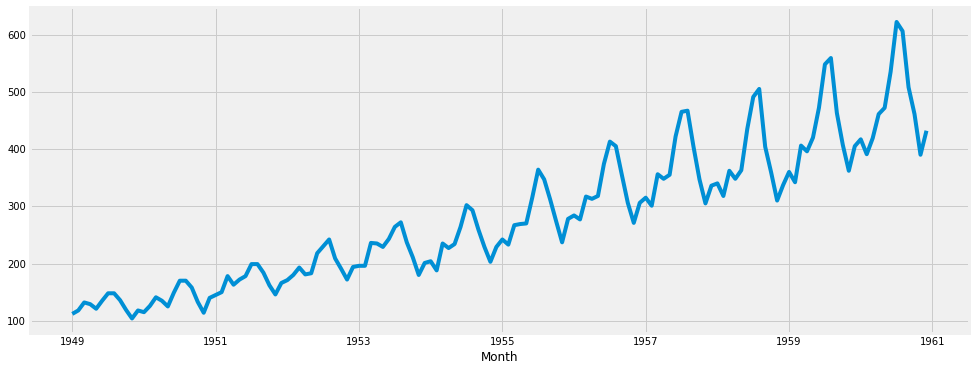

In [8]:
y.plot(figsize=(15, 6))
plt.show()

In [9]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [10]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))

            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
            
print('\nBest Result:', best_result)

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC: 1886.7694868585136
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC: 1498.2861801517845
ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC: 4168.927415206341
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC: 1156.291490150853
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC: 1016.136279733628
ARIMA(0, 0, 0)x(0, 1, 3, 12)12 - AIC: 3893.110061865283
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC: 942.1856088448575
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC: 834.3017303458444
ARIMA(0, 0, 0)x(0, 2, 3, 12)12 - AIC: 4103.327628632507
ARIMA(0, 0, 0)x(0, 3, 1, 12)12 - AIC: 909.9633990836521
ARIMA(0, 0, 0)x(0, 3, 2, 12)12 - AIC: 798.9622472679952
ARIMA(0, 0, 0)x(0, 4, 1, 12)12 - AIC: 854.0733794560251
ARIMA(0, 0, 0)x(0, 4, 2, 12)12 - AIC: 2299.5804719901225
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC: 1118.6259190717344
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC: 1107.256204323372
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC: 1014.6452265989703
ARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC: 3603.6740437934086
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC: 1109

ARIMA(0, 0, 1)x(3, 2, 1, 12)12 - AIC: 700.6001975064707
ARIMA(0, 0, 1)x(3, 2, 2, 12)12 - AIC: 702.4966468940787
ARIMA(0, 0, 1)x(3, 2, 3, 12)12 - AIC: 3083.674035069717
ARIMA(0, 0, 1)x(3, 3, 0, 12)12 - AIC: 641.5754393863695
ARIMA(0, 0, 1)x(3, 3, 1, 12)12 - AIC: 634.2776591658163
ARIMA(0, 0, 1)x(3, 3, 2, 12)12 - AIC: 636.9029194519696
ARIMA(0, 0, 1)x(3, 4, 0, 12)12 - AIC: 574.6817999051163
ARIMA(0, 0, 1)x(3, 4, 1, 12)12 - AIC: 582.7186055490064
ARIMA(0, 0, 1)x(3, 4, 2, 12)12 - AIC: 2356.7924426992504
ARIMA(0, 0, 1)x(4, 0, 0, 12)12 - AIC: 781.1066635231377
ARIMA(0, 0, 1)x(4, 0, 1, 12)12 - AIC: 787.9163369078037
ARIMA(0, 0, 1)x(4, 0, 2, 12)12 - AIC: 1057.536685787934
ARIMA(0, 0, 1)x(4, 0, 3, 12)12 - AIC: nan
ARIMA(0, 0, 1)x(4, 1, 0, 12)12 - AIC: 698.0433692574353
ARIMA(0, 0, 1)x(4, 1, 1, 12)12 - AIC: 683.507024939243
ARIMA(0, 0, 1)x(4, 1, 2, 12)12 - AIC: 685.1605053833953
ARIMA(0, 0, 1)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(0, 0, 1)x(4, 2, 0, 12)12 - AIC: 605.2420614507582
ARIMA(0, 0, 1)x(4, 2

ARIMA(0, 0, 3)x(1, 3, 1, 12)12 - AIC: 798.553586959043
ARIMA(0, 0, 3)x(1, 3, 2, 12)12 - AIC: 698.5808392096105
ARIMA(0, 0, 3)x(1, 4, 0, 12)12 - AIC: 782.8933756463792
ARIMA(0, 0, 3)x(1, 4, 1, 12)12 - AIC: 749.7212888195525
ARIMA(0, 0, 3)x(1, 4, 2, 12)12 - AIC: 2185.9949063994545
ARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC: 967.5654263930928
ARIMA(0, 0, 3)x(2, 0, 1, 12)12 - AIC: 941.4537570042332
ARIMA(0, 0, 3)x(2, 0, 2, 12)12 - AIC: 909.842181484491
ARIMA(0, 0, 3)x(2, 0, 3, 12)12 - AIC: 3369.586571060595
ARIMA(0, 0, 3)x(2, 1, 0, 12)12 - AIC: 889.5740334710149
ARIMA(0, 0, 3)x(2, 1, 1, 12)12 - AIC: 867.8020955273072
ARIMA(0, 0, 3)x(2, 1, 2, 12)12 - AIC: 836.0861086674805
ARIMA(0, 0, 3)x(2, 1, 3, 12)12 - AIC: 3518.0253886334426
ARIMA(0, 0, 3)x(2, 2, 0, 12)12 - AIC: 787.885266265188
ARIMA(0, 0, 3)x(2, 2, 1, 12)12 - AIC: 777.5725692389801
ARIMA(0, 0, 3)x(2, 2, 2, 12)12 - AIC: 742.1426822308858
ARIMA(0, 0, 3)x(2, 2, 3, 12)12 - AIC: 5489.276460274021
ARIMA(0, 0, 3)x(2, 3, 0, 12)12 - AIC: 737.1910223

ARIMA(0, 0, 4)x(4, 4, 2, 12)12 - AIC: 1870.4495830525852
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC: 1194.7130010979645
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC: 1045.9071668741103
ARIMA(0, 1, 0)x(0, 0, 3, 12)12 - AIC: 4756.939455858655
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC: 937.7995265380541
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC: 850.4577286835147
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC: 3859.6041618355885
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC: 860.2187086092401
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC: 756.4677251263346
ARIMA(0, 1, 0)x(0, 2, 3, 12)12 - AIC: 3447.2855399842456
ARIMA(0, 1, 0)x(0, 3, 1, 12)12 - AIC: 846.9538176067696
ARIMA(0, 1, 0)x(0, 3, 2, 12)12 - AIC: 746.9133224448442
ARIMA(0, 1, 0)x(0, 4, 1, 12)12 - AIC: 793.3295011644253
ARIMA(0, 1, 0)x(0, 4, 2, 12)12 - AIC: 2483.2255012627015
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC: 1031.4838983661916
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC: 1015.0000347579843
ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC: 932.5419802900773
ARIMA(0, 1, 0)x(1, 0, 3, 12)12 - AIC: 30

ARIMA(0, 1, 1)x(3, 2, 0, 12)12 - AIC: 664.5116260864355
ARIMA(0, 1, 1)x(3, 2, 1, 12)12 - AIC: 662.691121393983
ARIMA(0, 1, 1)x(3, 2, 2, 12)12 - AIC: 660.5202860586721
ARIMA(0, 1, 1)x(3, 2, 3, 12)12 - AIC: 3649.8108269982217
ARIMA(0, 1, 1)x(3, 3, 0, 12)12 - AIC: 610.5743755437119
ARIMA(0, 1, 1)x(3, 3, 1, 12)12 - AIC: 612.1452762638878
ARIMA(0, 1, 1)x(3, 3, 2, 12)12 - AIC: 613.6015962545163
ARIMA(0, 1, 1)x(3, 4, 0, 12)12 - AIC: 541.9655615986997
ARIMA(0, 1, 1)x(3, 4, 1, 12)12 - AIC: 543.9175633811902
ARIMA(0, 1, 1)x(3, 4, 2, 12)12 - AIC: 2167.602560642374
ARIMA(0, 1, 1)x(4, 0, 0, 12)12 - AIC: 744.1186569962381
ARIMA(0, 1, 1)x(4, 0, 1, 12)12 - AIC: 745.55717614381
ARIMA(0, 1, 1)x(4, 0, 2, 12)12 - AIC: 747.4777783398
ARIMA(0, 1, 1)x(4, 0, 3, 12)12 - AIC: nan
ARIMA(0, 1, 1)x(4, 1, 0, 12)12 - AIC: 663.7105360263986
ARIMA(0, 1, 1)x(4, 1, 1, 12)12 - AIC: 664.486539477279
ARIMA(0, 1, 1)x(4, 1, 2, 12)12 - AIC: 662.2727145572493
ARIMA(0, 1, 1)x(4, 1, 3, 12)12 - AIC: 3802.016670139395
ARIMA(0, 1, 

ARIMA(0, 1, 3)x(1, 3, 1, 12)12 - AIC: 781.6115681345708
ARIMA(0, 1, 3)x(1, 3, 2, 12)12 - AIC: 684.7104470666711
ARIMA(0, 1, 3)x(1, 4, 0, 12)12 - AIC: 817.5250156958643
ARIMA(0, 1, 3)x(1, 4, 1, 12)12 - AIC: 739.4299073749651
ARIMA(0, 1, 3)x(1, 4, 2, 12)12 - AIC: nan
ARIMA(0, 1, 3)x(2, 0, 0, 12)12 - AIC: 919.4511093788078
ARIMA(0, 1, 3)x(2, 0, 1, 12)12 - AIC: 921.2139897309413
ARIMA(0, 1, 3)x(2, 0, 2, 12)12 - AIC: 890.2521138015884
ARIMA(0, 1, 3)x(2, 0, 3, 12)12 - AIC: 6918.49219728259
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC: 848.5658534632513
ARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC: 850.2626410123546
ARIMA(0, 1, 3)x(2, 1, 2, 12)12 - AIC: 816.4105464173387
ARIMA(0, 1, 3)x(2, 1, 3, 12)12 - AIC: 3977.039534876036
ARIMA(0, 1, 3)x(2, 2, 0, 12)12 - AIC: 771.8922522433178
ARIMA(0, 1, 3)x(2, 2, 1, 12)12 - AIC: 756.871561098341
ARIMA(0, 1, 3)x(2, 2, 2, 12)12 - AIC: 723.5777979171658
ARIMA(0, 1, 3)x(2, 2, 3, 12)12 - AIC: 2331.659425405164
ARIMA(0, 1, 3)x(2, 3, 0, 12)12 - AIC: 721.3523002660014
ARIMA(0,

ARIMA(0, 1, 4)x(4, 4, 2, 12)12 - AIC: 1752.4344400024374
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC: 1243.6526185784837
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC: 1098.1903530335046
ARIMA(0, 2, 0)x(0, 0, 3, 12)12 - AIC: 4720.179834137727
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC: 1040.5815895172937
ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC: 940.0032780557184
ARIMA(0, 2, 0)x(0, 1, 3, 12)12 - AIC: 4096.847677684045
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC: 959.8188392350966
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC: 843.7329068662124
ARIMA(0, 2, 0)x(0, 2, 3, 12)12 - AIC: 2496.5172740857124
ARIMA(0, 2, 0)x(0, 3, 1, 12)12 - AIC: 926.2767726097281
ARIMA(0, 2, 0)x(0, 3, 2, 12)12 - AIC: 829.5545155953007
ARIMA(0, 2, 0)x(0, 4, 1, 12)12 - AIC: 858.5528349209493
ARIMA(0, 2, 0)x(0, 4, 2, 12)12 - AIC: 2451.2779527182443
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC: 1151.294110468074
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC: 1137.7894713684893
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC: 1040.7604509337016
ARIMA(0, 2, 0)x(1, 0, 3, 12)12 - AIC: 40

ARIMA(0, 2, 1)x(3, 1, 2, 12)12 - AIC: 763.1059520933845
ARIMA(0, 2, 1)x(3, 1, 3, 12)12 - AIC: 4114.800117982968
ARIMA(0, 2, 1)x(3, 2, 0, 12)12 - AIC: 685.3888004653799
ARIMA(0, 2, 1)x(3, 2, 1, 12)12 - AIC: 680.4606682464639
ARIMA(0, 2, 1)x(3, 2, 2, 12)12 - AIC: 677.4173378201735
ARIMA(0, 2, 1)x(3, 2, 3, 12)12 - AIC: 3793.7228029846287
ARIMA(0, 2, 1)x(3, 3, 0, 12)12 - AIC: 628.7989775922741
ARIMA(0, 2, 1)x(3, 3, 1, 12)12 - AIC: 630.3857032830037
ARIMA(0, 2, 1)x(3, 3, 2, 12)12 - AIC: 627.5380448892156
ARIMA(0, 2, 1)x(3, 4, 0, 12)12 - AIC: 587.6194962802218
ARIMA(0, 2, 1)x(3, 4, 1, 12)12 - AIC: 545.0928465310323
ARIMA(0, 2, 1)x(3, 4, 2, 12)12 - AIC: 2368.3448419946394
ARIMA(0, 2, 1)x(4, 0, 0, 12)12 - AIC: 757.6602603526018
ARIMA(0, 2, 1)x(4, 0, 1, 12)12 - AIC: 759.6585982365922
ARIMA(0, 2, 1)x(4, 0, 2, 12)12 - AIC: 761.6577915443943
ARIMA(0, 2, 1)x(4, 0, 3, 12)12 - AIC: 3597.56350925335
ARIMA(0, 2, 1)x(4, 1, 0, 12)12 - AIC: 671.7045671439965
ARIMA(0, 2, 1)x(4, 1, 1, 12)12 - AIC: 673.63776

ARIMA(0, 2, 3)x(1, 2, 2, 12)12 - AIC: 714.4741763025646
ARIMA(0, 2, 3)x(1, 2, 3, 12)12 - AIC: nan
ARIMA(0, 2, 3)x(1, 3, 0, 12)12 - AIC: 816.5656140862368
ARIMA(0, 2, 3)x(1, 3, 1, 12)12 - AIC: 779.3049497926995
ARIMA(0, 2, 3)x(1, 3, 2, 12)12 - AIC: 682.870543670147
ARIMA(0, 2, 3)x(1, 4, 0, 12)12 - AIC: 766.3333396966206
ARIMA(0, 2, 3)x(1, 4, 1, 12)12 - AIC: 728.4409165846414
ARIMA(0, 2, 3)x(1, 4, 2, 12)12 - AIC: 4759.71606206633
ARIMA(0, 2, 3)x(2, 0, 0, 12)12 - AIC: 919.7269262365209
ARIMA(0, 2, 3)x(2, 0, 1, 12)12 - AIC: 921.6203044643771
ARIMA(0, 2, 3)x(2, 0, 2, 12)12 - AIC: 886.9793898299639
ARIMA(0, 2, 3)x(2, 0, 3, 12)12 - AIC: 3623.884375359294
ARIMA(0, 2, 3)x(2, 1, 0, 12)12 - AIC: 849.7204868100923
ARIMA(0, 2, 3)x(2, 1, 1, 12)12 - AIC: 848.9649628004187
ARIMA(0, 2, 3)x(2, 1, 2, 12)12 - AIC: 817.9881755409843
ARIMA(0, 2, 3)x(2, 1, 3, 12)12 - AIC: 6371.947343132413
ARIMA(0, 2, 3)x(2, 2, 0, 12)12 - AIC: 770.5993850513039
ARIMA(0, 2, 3)x(2, 2, 1, 12)12 - AIC: 754.754862902291
ARIMA(0, 

ARIMA(0, 2, 4)x(4, 4, 1, 12)12 - AIC: 506.7872813854514
ARIMA(0, 2, 4)x(4, 4, 2, 12)12 - AIC: 2126.789336275541
ARIMA(0, 3, 0)x(0, 0, 1, 12)12 - AIC: 1355.254192797066
ARIMA(0, 3, 0)x(0, 0, 2, 12)12 - AIC: 1202.4105818009848
ARIMA(0, 3, 0)x(0, 0, 3, 12)12 - AIC: nan
ARIMA(0, 3, 0)x(0, 1, 1, 12)12 - AIC: 1166.9570133032666
ARIMA(0, 3, 0)x(0, 1, 2, 12)12 - AIC: 1051.2837257909007
ARIMA(0, 3, 0)x(0, 1, 3, 12)12 - AIC: nan
ARIMA(0, 3, 0)x(0, 2, 1, 12)12 - AIC: 1077.0968616216355
ARIMA(0, 3, 0)x(0, 2, 2, 12)12 - AIC: 945.460814294414
ARIMA(0, 3, 0)x(0, 2, 3, 12)12 - AIC: 2835.0078963871265
ARIMA(0, 3, 0)x(0, 3, 1, 12)12 - AIC: 1025.198553835206
ARIMA(0, 3, 0)x(0, 3, 2, 12)12 - AIC: 912.9230840395636
ARIMA(0, 3, 0)x(0, 4, 1, 12)12 - AIC: 939.144789347516
ARIMA(0, 3, 0)x(0, 4, 2, 12)12 - AIC: 2644.983956790207
ARIMA(0, 3, 0)x(1, 0, 0, 12)12 - AIC: 1294.643043585952
ARIMA(0, 3, 0)x(1, 0, 1, 12)12 - AIC: 1280.6157016868322
ARIMA(0, 3, 0)x(1, 0, 2, 12)12 - AIC: 1168.447107402029
ARIMA(0, 3, 0)x(

ARIMA(0, 3, 1)x(3, 2, 0, 12)12 - AIC: 763.7539730314295
ARIMA(0, 3, 1)x(3, 2, 1, 12)12 - AIC: 755.7158190947833
ARIMA(0, 3, 1)x(3, 2, 2, 12)12 - AIC: 754.4596098343707
ARIMA(0, 3, 1)x(3, 2, 3, 12)12 - AIC: 5857.348925720997
ARIMA(0, 3, 1)x(3, 3, 0, 12)12 - AIC: 693.8491422417699
ARIMA(0, 3, 1)x(3, 3, 1, 12)12 - AIC: 694.6023760668894
ARIMA(0, 3, 1)x(3, 3, 2, 12)12 - AIC: 689.0084589333488
ARIMA(0, 3, 1)x(3, 4, 0, 12)12 - AIC: 629.1588099565911
ARIMA(0, 3, 1)x(3, 4, 1, 12)12 - AIC: 697.9808809915776
ARIMA(0, 3, 1)x(3, 4, 2, 12)12 - AIC: 4019.1337751867013
ARIMA(0, 3, 1)x(4, 0, 0, 12)12 - AIC: 842.3166681528835
ARIMA(0, 3, 1)x(4, 0, 1, 12)12 - AIC: 844.1195381892358
ARIMA(0, 3, 1)x(4, 0, 2, 12)12 - AIC: 845.547970599665
ARIMA(0, 3, 1)x(4, 0, 3, 12)12 - AIC: 2782.820388395316
ARIMA(0, 3, 1)x(4, 1, 0, 12)12 - AIC: 737.324681737097
ARIMA(0, 3, 1)x(4, 1, 1, 12)12 - AIC: 738.9979890615061
ARIMA(0, 3, 1)x(4, 1, 2, 12)12 - AIC: 731.9150609280014
ARIMA(0, 3, 1)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(0

ARIMA(0, 3, 3)x(1, 3, 1, 12)12 - AIC: 778.1472842030583
ARIMA(0, 3, 3)x(1, 3, 2, 12)12 - AIC: 684.5336578040253
ARIMA(0, 3, 3)x(1, 4, 0, 12)12 - AIC: 816.0319556923026
ARIMA(0, 3, 3)x(1, 4, 1, 12)12 - AIC: 969.1276026180623
ARIMA(0, 3, 3)x(1, 4, 2, 12)12 - AIC: 4902.747778160408
ARIMA(0, 3, 3)x(2, 0, 0, 12)12 - AIC: 928.1160700117186
ARIMA(0, 3, 3)x(2, 0, 1, 12)12 - AIC: 928.2900873231878
ARIMA(0, 3, 3)x(2, 0, 2, 12)12 - AIC: 1023.6387830133189
ARIMA(0, 3, 3)x(2, 0, 3, 12)12 - AIC: 6742.505909888947
ARIMA(0, 3, 3)x(2, 1, 0, 12)12 - AIC: 860.8686711993402
ARIMA(0, 3, 3)x(2, 1, 1, 12)12 - AIC: 859.8894157426666
ARIMA(0, 3, 3)x(2, 1, 2, 12)12 - AIC: 829.6592295134247
ARIMA(0, 3, 3)x(2, 1, 3, 12)12 - AIC: nan
ARIMA(0, 3, 3)x(2, 2, 0, 12)12 - AIC: 776.0080190247457
ARIMA(0, 3, 3)x(2, 2, 1, 12)12 - AIC: 784.8214142067369
ARIMA(0, 3, 3)x(2, 2, 2, 12)12 - AIC: 729.0091401926655
ARIMA(0, 3, 3)x(2, 2, 3, 12)12 - AIC: 6007.433760863307
ARIMA(0, 3, 3)x(2, 3, 0, 12)12 - AIC: 724.5229811163518
ARIMA

ARIMA(0, 4, 0)x(0, 0, 2, 12)12 - AIC: 1323.6756174805546
ARIMA(0, 4, 0)x(0, 0, 3, 12)12 - AIC: nan
ARIMA(0, 4, 0)x(0, 1, 1, 12)12 - AIC: 1297.4070296706484
ARIMA(0, 4, 0)x(0, 1, 2, 12)12 - AIC: 1167.3576183798061
ARIMA(0, 4, 0)x(0, 1, 3, 12)12 - AIC: 3037.932127446479
ARIMA(0, 4, 0)x(0, 2, 1, 12)12 - AIC: 1197.0901724902192
ARIMA(0, 4, 0)x(0, 2, 2, 12)12 - AIC: 1048.3259668351634
ARIMA(0, 4, 0)x(0, 2, 3, 12)12 - AIC: 2974.4300619201035
ARIMA(0, 4, 0)x(0, 3, 1, 12)12 - AIC: 1126.2113089134884
ARIMA(0, 4, 0)x(0, 3, 2, 12)12 - AIC: 988.6444352273779
ARIMA(0, 4, 0)x(0, 4, 1, 12)12 - AIC: 1018.036841103057
ARIMA(0, 4, 0)x(0, 4, 2, 12)12 - AIC: 4613.3773582650965
ARIMA(0, 4, 0)x(1, 0, 0, 12)12 - AIC: 1443.1258677939084
ARIMA(0, 4, 0)x(1, 0, 1, 12)12 - AIC: 1427.397846597347
ARIMA(0, 4, 0)x(1, 0, 2, 12)12 - AIC: 1299.5520368149014
ARIMA(0, 4, 0)x(1, 0, 3, 12)12 - AIC: nan
ARIMA(0, 4, 0)x(1, 1, 0, 12)12 - AIC: 1315.2805143928706
ARIMA(0, 4, 0)x(1, 1, 1, 12)12 - AIC: 1299.2080133183097
ARIMA(0,

ARIMA(0, 4, 1)x(3, 2, 2, 12)12 - AIC: 843.5374392897407
ARIMA(0, 4, 1)x(3, 2, 3, 12)12 - AIC: nan
ARIMA(0, 4, 1)x(3, 3, 0, 12)12 - AIC: 766.0604114626738
ARIMA(0, 4, 1)x(3, 3, 1, 12)12 - AIC: 766.0389731131291
ARIMA(0, 4, 1)x(3, 3, 2, 12)12 - AIC: 822.6106347057771
ARIMA(0, 4, 1)x(3, 4, 0, 12)12 - AIC: 698.5049737062866
ARIMA(0, 4, 1)x(3, 4, 1, 12)12 - AIC: 796.7602289775617
ARIMA(0, 4, 1)x(3, 4, 2, 12)12 - AIC: 1803.3763626343514
ARIMA(0, 4, 1)x(4, 0, 0, 12)12 - AIC: 937.7522110083931
ARIMA(0, 4, 1)x(4, 0, 1, 12)12 - AIC: 937.5609716871418
ARIMA(0, 4, 1)x(4, 0, 2, 12)12 - AIC: 939.5120842508328
ARIMA(0, 4, 1)x(4, 0, 3, 12)12 - AIC: 6060.320127274233
ARIMA(0, 4, 1)x(4, 1, 0, 12)12 - AIC: 815.3435312835334
ARIMA(0, 4, 1)x(4, 1, 1, 12)12 - AIC: 817.2878111944867
ARIMA(0, 4, 1)x(4, 1, 2, 12)12 - AIC: 809.5910878802753
ARIMA(0, 4, 1)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(0, 4, 1)x(4, 2, 0, 12)12 - AIC: 710.514724236362
ARIMA(0, 4, 1)x(4, 2, 1, 12)12 - AIC: 704.6016772505728
ARIMA(0, 4, 1)x(4, 2

ARIMA(0, 4, 3)x(1, 4, 2, 12)12 - AIC: 4557.848480961878
ARIMA(0, 4, 3)x(2, 0, 0, 12)12 - AIC: 1032.5469570620244
ARIMA(0, 4, 3)x(2, 0, 1, 12)12 - AIC: 1030.6488920790352
ARIMA(0, 4, 3)x(2, 0, 2, 12)12 - AIC: 1131.9861580235306
ARIMA(0, 4, 3)x(2, 0, 3, 12)12 - AIC: nan
ARIMA(0, 4, 3)x(2, 1, 0, 12)12 - AIC: 928.237940782443
ARIMA(0, 4, 3)x(2, 1, 1, 12)12 - AIC: 930.7786139845434
ARIMA(0, 4, 3)x(2, 1, 2, 12)12 - AIC: 894.6511960582575
ARIMA(0, 4, 3)x(2, 1, 3, 12)12 - AIC: 6304.213421355642
ARIMA(0, 4, 3)x(2, 2, 0, 12)12 - AIC: 842.6647046750669
ARIMA(0, 4, 3)x(2, 2, 1, 12)12 - AIC: 886.81958981946
ARIMA(0, 4, 3)x(2, 2, 2, 12)12 - AIC: 855.0613325153022
ARIMA(0, 4, 3)x(2, 2, 3, 12)12 - AIC: 5977.410860613131
ARIMA(0, 4, 3)x(2, 3, 0, 12)12 - AIC: 859.3309679776364
ARIMA(0, 4, 3)x(2, 3, 1, 12)12 - AIC: 862.9348755324947
ARIMA(0, 4, 3)x(2, 3, 2, 12)12 - AIC: 870.1137258684784
ARIMA(0, 4, 3)x(2, 4, 0, 12)12 - AIC: 932.2269913774124
ARIMA(0, 4, 3)x(2, 4, 1, 12)12 - AIC: 931.3560862159873
ARIMA(

ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC: 856.9391561803692
ARIMA(1, 0, 0)x(0, 1, 3, 12)12 - AIC: 3951.4698848611715
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC: 1013.1086704233073
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC: 855.2243533435555
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC: 755.3580175355494
ARIMA(1, 0, 0)x(0, 2, 3, 12)12 - AIC: 2802.5321819228175
ARIMA(1, 0, 0)x(0, 3, 0, 12)12 - AIC: 999.4411069692468
ARIMA(1, 0, 0)x(0, 3, 1, 12)12 - AIC: 844.3165710250605
ARIMA(1, 0, 0)x(0, 3, 2, 12)12 - AIC: 745.3506112230893
ARIMA(1, 0, 0)x(0, 4, 0, 12)12 - AIC: 922.0934719421966
ARIMA(1, 0, 0)x(0, 4, 1, 12)12 - AIC: 793.7953399982224
ARIMA(1, 0, 0)x(0, 4, 2, 12)12 - AIC: 2311.2979566613894
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC: 1017.3155493548018
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC: 1007.0272556234037
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC: 925.0288685672381
ARIMA(1, 0, 0)x(1, 0, 3, 12)12 - AIC: 4303.9785719746305
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC: 944.0441660823157
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC: 945

ARIMA(1, 0, 1)x(3, 2, 1, 12)12 - AIC: 662.2453723859866
ARIMA(1, 0, 1)x(3, 2, 2, 12)12 - AIC: 660.235908340154
ARIMA(1, 0, 1)x(3, 2, 3, 12)12 - AIC: 2765.539902551718
ARIMA(1, 0, 1)x(3, 3, 0, 12)12 - AIC: 609.1186735825349
ARIMA(1, 0, 1)x(3, 3, 1, 12)12 - AIC: 610.5572955720576
ARIMA(1, 0, 1)x(3, 3, 2, 12)12 - AIC: 612.7113328805954
ARIMA(1, 0, 1)x(3, 4, 0, 12)12 - AIC: 542.0378570427545
ARIMA(1, 0, 1)x(3, 4, 1, 12)12 - AIC: 543.8941369320623
ARIMA(1, 0, 1)x(3, 4, 2, 12)12 - AIC: 2654.713878061333
ARIMA(1, 0, 1)x(4, 0, 0, 12)12 - AIC: 741.6759560125807
ARIMA(1, 0, 1)x(4, 0, 1, 12)12 - AIC: 743.0433986849791
ARIMA(1, 0, 1)x(4, 0, 2, 12)12 - AIC: 745.0400232351136
ARIMA(1, 0, 1)x(4, 0, 3, 12)12 - AIC: 2943.96222960862
ARIMA(1, 0, 1)x(4, 1, 0, 12)12 - AIC: 664.3493048364152
ARIMA(1, 0, 1)x(4, 1, 1, 12)12 - AIC: 662.8789317809433
ARIMA(1, 0, 1)x(4, 1, 2, 12)12 - AIC: 660.86991236676
ARIMA(1, 0, 1)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(1, 0, 1)x(4, 2, 0, 12)12 - AIC: 569.0792130311235
ARIMA(1, 0

ARIMA(1, 0, 3)x(1, 3, 1, 12)12 - AIC: 788.3362937882697
ARIMA(1, 0, 3)x(1, 3, 2, 12)12 - AIC: 700.4439620461957
ARIMA(1, 0, 3)x(1, 4, 0, 12)12 - AIC: 815.2319105479669
ARIMA(1, 0, 3)x(1, 4, 1, 12)12 - AIC: 740.6575267043144
ARIMA(1, 0, 3)x(1, 4, 2, 12)12 - AIC: 2569.8292477314208
ARIMA(1, 0, 3)x(2, 0, 0, 12)12 - AIC: 917.8070280507517
ARIMA(1, 0, 3)x(2, 0, 1, 12)12 - AIC: 919.446374112037
ARIMA(1, 0, 3)x(2, 0, 2, 12)12 - AIC: 896.2865045702919
ARIMA(1, 0, 3)x(2, 0, 3, 12)12 - AIC: 3438.309560756821
ARIMA(1, 0, 3)x(2, 1, 0, 12)12 - AIC: 849.818308228089
ARIMA(1, 0, 3)x(2, 1, 1, 12)12 - AIC: 849.7867217460151
ARIMA(1, 0, 3)x(2, 1, 2, 12)12 - AIC: 826.3095879763644
ARIMA(1, 0, 3)x(2, 1, 3, 12)12 - AIC: 3375.8673191660123
ARIMA(1, 0, 3)x(2, 2, 0, 12)12 - AIC: 769.7214268077084
ARIMA(1, 0, 3)x(2, 2, 1, 12)12 - AIC: 755.8279286490526
ARIMA(1, 0, 3)x(2, 2, 2, 12)12 - AIC: 729.2219813795872
ARIMA(1, 0, 3)x(2, 2, 3, 12)12 - AIC: 5683.110817279832
ARIMA(1, 0, 3)x(2, 3, 0, 12)12 - AIC: 719.781141

ARIMA(1, 0, 4)x(4, 4, 2, 12)12 - AIC: 1838.3219229236247
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC: 1392.9437938537153
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC: 1190.5342929076469
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC: 1045.5148012568948
ARIMA(1, 1, 0)x(0, 0, 3, 12)12 - AIC: 3941.4240703551413
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC: 1013.3680449838097
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC: 928.1312837305609
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC: 840.9010429102796
ARIMA(1, 1, 0)x(0, 1, 3, 12)12 - AIC: 3202.9055603492343
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC: 1007.5648892298127
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC: 844.1485338898138
ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC: 742.4587336576838
ARIMA(1, 1, 0)x(0, 2, 3, 12)12 - AIC: 3176.1328784812936
ARIMA(1, 1, 0)x(0, 3, 0, 12)12 - AIC: 996.9732950811082
ARIMA(1, 1, 0)x(0, 3, 1, 12)12 - AIC: 838.2752330196978
ARIMA(1, 1, 0)x(0, 3, 2, 12)12 - AIC: 735.8714323348252
ARIMA(1, 1, 0)x(0, 4, 0, 12)12 - AIC: 915.6164763251402
ARIMA(1, 1, 0)x(0, 4, 1, 12)12 - AIC: 7

ARIMA(1, 1, 1)x(3, 0, 3, 12)12 - AIC: 3670.179982111971
ARIMA(1, 1, 1)x(3, 1, 0, 12)12 - AIC: 753.2160418936764
ARIMA(1, 1, 1)x(3, 1, 1, 12)12 - AIC: 754.3431986141854
ARIMA(1, 1, 1)x(3, 1, 2, 12)12 - AIC: 751.4163840867857
ARIMA(1, 1, 1)x(3, 1, 3, 12)12 - AIC: 3814.4066813701797
ARIMA(1, 1, 1)x(3, 2, 0, 12)12 - AIC: 656.8079968538993
ARIMA(1, 1, 1)x(3, 2, 1, 12)12 - AIC: 656.2750303652555
ARIMA(1, 1, 1)x(3, 2, 2, 12)12 - AIC: 653.6845800747842
ARIMA(1, 1, 1)x(3, 2, 3, 12)12 - AIC: 3615.519260568276
ARIMA(1, 1, 1)x(3, 3, 0, 12)12 - AIC: 601.1040686224914
ARIMA(1, 1, 1)x(3, 3, 1, 12)12 - AIC: 603.1036262983882
ARIMA(1, 1, 1)x(3, 3, 2, 12)12 - AIC: 602.5116331672078
ARIMA(1, 1, 1)x(3, 4, 0, 12)12 - AIC: 535.3661614296878
ARIMA(1, 1, 1)x(3, 4, 1, 12)12 - AIC: 537.6021388420829
ARIMA(1, 1, 1)x(3, 4, 2, 12)12 - AIC: nan
ARIMA(1, 1, 1)x(4, 0, 0, 12)12 - AIC: 738.6830465032959
ARIMA(1, 1, 1)x(4, 0, 1, 12)12 - AIC: 740.0889015633146
ARIMA(1, 1, 1)x(4, 0, 2, 12)12 - AIC: 742.0423485619065
ARIMA

ARIMA(1, 1, 3)x(1, 1, 3, 12)12 - AIC: 4399.715019453991
ARIMA(1, 1, 3)x(1, 2, 0, 12)12 - AIC: 866.0251299870836
ARIMA(1, 1, 3)x(1, 2, 1, 12)12 - AIC: 819.1502274227181
ARIMA(1, 1, 3)x(1, 2, 2, 12)12 - AIC: 724.7642828477574
ARIMA(1, 1, 3)x(1, 2, 3, 12)12 - AIC: 2027.2285936768785
ARIMA(1, 1, 3)x(1, 3, 0, 12)12 - AIC: 813.6196282278862
ARIMA(1, 1, 3)x(1, 3, 1, 12)12 - AIC: 782.1482714800844
ARIMA(1, 1, 3)x(1, 3, 2, 12)12 - AIC: 686.9635148537786
ARIMA(1, 1, 3)x(1, 4, 0, 12)12 - AIC: 810.8713656641692
ARIMA(1, 1, 3)x(1, 4, 1, 12)12 - AIC: 742.3834611316096
ARIMA(1, 1, 3)x(1, 4, 2, 12)12 - AIC: nan
ARIMA(1, 1, 3)x(2, 0, 0, 12)12 - AIC: 912.0855143416129
ARIMA(1, 1, 3)x(2, 0, 1, 12)12 - AIC: 914.055215398503
ARIMA(1, 1, 3)x(2, 0, 2, 12)12 - AIC: 891.5761598159468
ARIMA(1, 1, 3)x(2, 0, 3, 12)12 - AIC: 6725.719567218144
ARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC: 842.9637087735857
ARIMA(1, 1, 3)x(2, 1, 1, 12)12 - AIC: 841.8682872751618
ARIMA(1, 1, 3)x(2, 1, 2, 12)12 - AIC: 820.5036850369968
ARIMA(

ARIMA(1, 1, 4)x(4, 2, 3, 12)12 - AIC: 3432.7410063195684
ARIMA(1, 1, 4)x(4, 3, 0, 12)12 - AIC: 501.155842710975
ARIMA(1, 1, 4)x(4, 3, 1, 12)12 - AIC: 502.9073416117508
ARIMA(1, 1, 4)x(4, 3, 2, 12)12 - AIC: 503.929311110788
ARIMA(1, 1, 4)x(4, 4, 0, 12)12 - AIC: 424.98141983813974
ARIMA(1, 1, 4)x(4, 4, 1, 12)12 - AIC: 438.2659783176994
ARIMA(1, 1, 4)x(4, 4, 2, 12)12 - AIC: 1972.3319755570221
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC: 1437.7804261138265
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC: 1231.1825830140447
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC: 1081.9764543144238
ARIMA(1, 2, 0)x(0, 0, 3, 12)12 - AIC: 4117.0780079412125
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC: 1070.3158241110846
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC: 978.817430456756
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC: 887.7471694284958
ARIMA(1, 2, 0)x(0, 1, 3, 12)12 - AIC: 3540.6003698751083
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC: 1049.7918554976234
ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC: 893.6568907977515
ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC: 793

ARIMA(1, 2, 1)x(2, 3, 2, 12)12 - AIC: 701.0521356321073
ARIMA(1, 2, 1)x(2, 4, 0, 12)12 - AIC: 632.5383795671357
ARIMA(1, 2, 1)x(2, 4, 1, 12)12 - AIC: 628.3063556586577
ARIMA(1, 2, 1)x(2, 4, 2, 12)12 - AIC: 3014.7967278518286
ARIMA(1, 2, 1)x(3, 0, 0, 12)12 - AIC: 827.5290909547285
ARIMA(1, 2, 1)x(3, 0, 1, 12)12 - AIC: 829.527227368917
ARIMA(1, 2, 1)x(3, 0, 2, 12)12 - AIC: 829.3542816701145
ARIMA(1, 2, 1)x(3, 0, 3, 12)12 - AIC: 3988.337760460536
ARIMA(1, 2, 1)x(3, 1, 0, 12)12 - AIC: 746.7052628128934
ARIMA(1, 2, 1)x(3, 1, 1, 12)12 - AIC: 748.7041806481006
ARIMA(1, 2, 1)x(3, 1, 2, 12)12 - AIC: 750.6580138091302
ARIMA(1, 2, 1)x(3, 1, 3, 12)12 - AIC: nan
ARIMA(1, 2, 1)x(3, 2, 0, 12)12 - AIC: 657.8120766195176
ARIMA(1, 2, 1)x(3, 2, 1, 12)12 - AIC: 659.7489452040326
ARIMA(1, 2, 1)x(3, 2, 2, 12)12 - AIC: 652.9148113590874
ARIMA(1, 2, 1)x(3, 2, 3, 12)12 - AIC: 3647.7083240369957
ARIMA(1, 2, 1)x(3, 3, 0, 12)12 - AIC: 600.4455132714206
ARIMA(1, 2, 1)x(3, 3, 1, 12)12 - AIC: 602.2123777732229
ARIMA

ARIMA(1, 2, 3)x(0, 4, 2, 12)12 - AIC: 2376.5537123950517
ARIMA(1, 2, 3)x(1, 0, 0, 12)12 - AIC: 1011.3545934717381
ARIMA(1, 2, 3)x(1, 0, 1, 12)12 - AIC: 973.3162326912326
ARIMA(1, 2, 3)x(1, 0, 2, 12)12 - AIC: 892.4953298301159
ARIMA(1, 2, 3)x(1, 0, 3, 12)12 - AIC: 3253.39005538844
ARIMA(1, 2, 3)x(1, 1, 0, 12)12 - AIC: 930.4122754949733
ARIMA(1, 2, 3)x(1, 1, 1, 12)12 - AIC: 906.3067326841519
ARIMA(1, 2, 3)x(1, 1, 2, 12)12 - AIC: 817.8556507723343
ARIMA(1, 2, 3)x(1, 1, 3, 12)12 - AIC: 3645.0165971421297
ARIMA(1, 2, 3)x(1, 2, 0, 12)12 - AIC: 864.0638568324398
ARIMA(1, 2, 3)x(1, 2, 1, 12)12 - AIC: 815.33285582173
ARIMA(1, 2, 3)x(1, 2, 2, 12)12 - AIC: 716.2450159654247
ARIMA(1, 2, 3)x(1, 2, 3, 12)12 - AIC: 8130.73769430007
ARIMA(1, 2, 3)x(1, 3, 0, 12)12 - AIC: 807.9960631901582
ARIMA(1, 2, 3)x(1, 3, 1, 12)12 - AIC: 777.9060511657465
ARIMA(1, 2, 3)x(1, 3, 2, 12)12 - AIC: 684.2011354423328
ARIMA(1, 2, 3)x(1, 4, 0, 12)12 - AIC: 757.935621666159
ARIMA(1, 2, 3)x(1, 4, 1, 12)12 - AIC: 720.93274866

ARIMA(1, 2, 4)x(4, 0, 3, 12)12 - AIC: 6489.799648882373
ARIMA(1, 2, 4)x(4, 1, 0, 12)12 - AIC: 656.7669861373083
ARIMA(1, 2, 4)x(4, 1, 1, 12)12 - AIC: 658.290249727714
ARIMA(1, 2, 4)x(4, 1, 2, 12)12 - AIC: 659.6410571707597
ARIMA(1, 2, 4)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(1, 2, 4)x(4, 2, 0, 12)12 - AIC: 564.295890456339
ARIMA(1, 2, 4)x(4, 2, 1, 12)12 - AIC: 560.3383267511579
ARIMA(1, 2, 4)x(4, 2, 2, 12)12 - AIC: 562.1175963426156
ARIMA(1, 2, 4)x(4, 2, 3, 12)12 - AIC: 2787.702364624526
ARIMA(1, 2, 4)x(4, 3, 0, 12)12 - AIC: 506.4694879608062
ARIMA(1, 2, 4)x(4, 3, 1, 12)12 - AIC: 508.12058137246663
ARIMA(1, 2, 4)x(4, 3, 2, 12)12 - AIC: 510.7966540685154
ARIMA(1, 2, 4)x(4, 4, 0, 12)12 - AIC: 518.3207796532663
ARIMA(1, 2, 4)x(4, 4, 1, 12)12 - AIC: 503.02192768354433
ARIMA(1, 2, 4)x(4, 4, 2, 12)12 - AIC: 1762.3556517078534
ARIMA(1, 3, 0)x(0, 0, 0, 12)12 - AIC: 1513.816356930975
ARIMA(1, 3, 0)x(0, 0, 1, 12)12 - AIC: 1302.2629895479595
ARIMA(1, 3, 0)x(0, 0, 2, 12)12 - AIC: 1149.448169128768
ARIM

ARIMA(1, 3, 1)x(2, 2, 0, 12)12 - AIC: 807.8056206528821
ARIMA(1, 3, 1)x(2, 2, 1, 12)12 - AIC: 809.4227031720651
ARIMA(1, 3, 1)x(2, 2, 2, 12)12 - AIC: 789.2878356937318
ARIMA(1, 3, 1)x(2, 2, 3, 12)12 - AIC: 3320.36858665783
ARIMA(1, 3, 1)x(2, 3, 0, 12)12 - AIC: 752.1641374374215
ARIMA(1, 3, 1)x(2, 3, 1, 12)12 - AIC: 752.7232152460688
ARIMA(1, 3, 1)x(2, 3, 2, 12)12 - AIC: 742.5955611376943
ARIMA(1, 3, 1)x(2, 4, 0, 12)12 - AIC: 671.9605929823416
ARIMA(1, 3, 1)x(2, 4, 1, 12)12 - AIC: 660.8964431341276
ARIMA(1, 3, 1)x(2, 4, 2, 12)12 - AIC: 2405.164729511352
ARIMA(1, 3, 1)x(3, 0, 0, 12)12 - AIC: 883.5131171649255
ARIMA(1, 3, 1)x(3, 0, 1, 12)12 - AIC: 885.3655560135221
ARIMA(1, 3, 1)x(3, 0, 2, 12)12 - AIC: 886.2639724904451
ARIMA(1, 3, 1)x(3, 0, 3, 12)12 - AIC: nan
ARIMA(1, 3, 1)x(3, 1, 0, 12)12 - AIC: 788.2020690725664
ARIMA(1, 3, 1)x(3, 1, 1, 12)12 - AIC: 789.6382211819814
ARIMA(1, 3, 1)x(3, 1, 2, 12)12 - AIC: 789.5997102975349
ARIMA(1, 3, 1)x(3, 1, 3, 12)12 - AIC: 3775.3319126676674
ARIMA(

ARIMA(1, 3, 3)x(0, 3, 2, 12)12 - AIC: 711.7500740796088
ARIMA(1, 3, 3)x(0, 4, 0, 12)12 - AIC: 877.8579884954139
ARIMA(1, 3, 3)x(0, 4, 1, 12)12 - AIC: 743.5005188622395
ARIMA(1, 3, 3)x(0, 4, 2, 12)12 - AIC: 4739.559423931562
ARIMA(1, 3, 3)x(1, 0, 0, 12)12 - AIC: 1092.58988217455
ARIMA(1, 3, 3)x(1, 0, 1, 12)12 - AIC: 1130.8318746196005
ARIMA(1, 3, 3)x(1, 0, 2, 12)12 - AIC: 1023.0348399278162
ARIMA(1, 3, 3)x(1, 0, 3, 12)12 - AIC: 6582.356514255609
ARIMA(1, 3, 3)x(1, 1, 0, 12)12 - AIC: 928.9602762757743
ARIMA(1, 3, 3)x(1, 1, 1, 12)12 - AIC: 911.8057652830216
ARIMA(1, 3, 3)x(1, 1, 2, 12)12 - AIC: 823.0198488032529
ARIMA(1, 3, 3)x(1, 1, 3, 12)12 - AIC: nan
ARIMA(1, 3, 3)x(1, 2, 0, 12)12 - AIC: 867.8178031321668
ARIMA(1, 3, 3)x(1, 2, 1, 12)12 - AIC: 834.4799390164096
ARIMA(1, 3, 3)x(1, 2, 2, 12)12 - AIC: 742.0947932803974
ARIMA(1, 3, 3)x(1, 2, 3, 12)12 - AIC: nan
ARIMA(1, 3, 3)x(1, 3, 0, 12)12 - AIC: 812.3873965494048
ARIMA(1, 3, 3)x(1, 3, 1, 12)12 - AIC: 779.985374359077
ARIMA(1, 3, 3)x(1, 3

ARIMA(1, 3, 4)x(4, 1, 0, 12)12 - AIC: 668.172507676918
ARIMA(1, 3, 4)x(4, 1, 1, 12)12 - AIC: 670.5541006543319
ARIMA(1, 3, 4)x(4, 1, 2, 12)12 - AIC: 670.5190360907543
ARIMA(1, 3, 4)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(1, 3, 4)x(4, 2, 0, 12)12 - AIC: 576.6491951793852
ARIMA(1, 3, 4)x(4, 2, 1, 12)12 - AIC: 571.3249766599857
ARIMA(1, 3, 4)x(4, 2, 2, 12)12 - AIC: 565.0558848160223
ARIMA(1, 3, 4)x(4, 2, 3, 12)12 - AIC: 2478.6794509925594
ARIMA(1, 3, 4)x(4, 3, 0, 12)12 - AIC: 531.9236315050445
ARIMA(1, 3, 4)x(4, 3, 1, 12)12 - AIC: 534.5101959437062
ARIMA(1, 3, 4)x(4, 3, 2, 12)12 - AIC: 531.0371383949728
ARIMA(1, 3, 4)x(4, 4, 0, 12)12 - AIC: 560.6932823451485
ARIMA(1, 3, 4)x(4, 4, 1, 12)12 - AIC: 560.5343213522599
ARIMA(1, 3, 4)x(4, 4, 2, 12)12 - AIC: 1808.3816416562536
ARIMA(1, 4, 0)x(0, 0, 0, 12)12 - AIC: 1620.1551536351362
ARIMA(1, 4, 0)x(0, 0, 1, 12)12 - AIC: 1400.9107013469018
ARIMA(1, 4, 0)x(0, 0, 2, 12)12 - AIC: 1241.6188192418451
ARIMA(1, 4, 0)x(0, 0, 3, 12)12 - AIC: nan
ARIMA(1, 4, 0)x(

ARIMA(1, 4, 1)x(2, 2, 0, 12)12 - AIC: 880.8098661473106
ARIMA(1, 4, 1)x(2, 2, 1, 12)12 - AIC: 868.6905711154732
ARIMA(1, 4, 1)x(2, 2, 2, 12)12 - AIC: 862.4805107658673
ARIMA(1, 4, 1)x(2, 2, 3, 12)12 - AIC: 3332.045316069736
ARIMA(1, 4, 1)x(2, 3, 0, 12)12 - AIC: 815.1411985921487
ARIMA(1, 4, 1)x(2, 3, 1, 12)12 - AIC: 815.3206197268299
ARIMA(1, 4, 1)x(2, 3, 2, 12)12 - AIC: 797.4721582006023
ARIMA(1, 4, 1)x(2, 4, 0, 12)12 - AIC: 827.2657419287486
ARIMA(1, 4, 1)x(2, 4, 1, 12)12 - AIC: 708.9268984478913
ARIMA(1, 4, 1)x(2, 4, 2, 12)12 - AIC: 2092.790005237521
ARIMA(1, 4, 1)x(3, 0, 0, 12)12 - AIC: 969.1185235861471
ARIMA(1, 4, 1)x(3, 0, 1, 12)12 - AIC: 970.7581068476904
ARIMA(1, 4, 1)x(3, 0, 2, 12)12 - AIC: 971.8145560715388
ARIMA(1, 4, 1)x(3, 0, 3, 12)12 - AIC: nan
ARIMA(1, 4, 1)x(3, 1, 0, 12)12 - AIC: 858.7502292579389
ARIMA(1, 4, 1)x(3, 1, 1, 12)12 - AIC: 860.4854194592505
ARIMA(1, 4, 1)x(3, 1, 2, 12)12 - AIC: 858.6334482376199
ARIMA(1, 4, 1)x(3, 1, 3, 12)12 - AIC: 2652.714069411534
ARIMA(

ARIMA(1, 4, 3)x(0, 4, 0, 12)12 - AIC: 890.9207117351864
ARIMA(1, 4, 3)x(0, 4, 1, 12)12 - AIC: 859.8803097319801
ARIMA(1, 4, 3)x(0, 4, 2, 12)12 - AIC: 4265.522589961494
ARIMA(1, 4, 3)x(1, 0, 0, 12)12 - AIC: 1036.9646026912806
ARIMA(1, 4, 3)x(1, 0, 1, 12)12 - AIC: 1191.8367361913822
ARIMA(1, 4, 3)x(1, 0, 2, 12)12 - AIC: 984.0289401520545
ARIMA(1, 4, 3)x(1, 0, 3, 12)12 - AIC: nan
ARIMA(1, 4, 3)x(1, 1, 0, 12)12 - AIC: 990.4440293359526
ARIMA(1, 4, 3)x(1, 1, 1, 12)12 - AIC: 966.9620498536733
ARIMA(1, 4, 3)x(1, 1, 2, 12)12 - AIC: 868.6329249541018
ARIMA(1, 4, 3)x(1, 1, 3, 12)12 - AIC: 6034.3989604749195
ARIMA(1, 4, 3)x(1, 2, 0, 12)12 - AIC: 941.946063362225
ARIMA(1, 4, 3)x(1, 2, 1, 12)12 - AIC: 906.3854490588811
ARIMA(1, 4, 3)x(1, 2, 2, 12)12 - AIC: 799.4864800196441
ARIMA(1, 4, 3)x(1, 2, 3, 12)12 - AIC: 5799.210749674186
ARIMA(1, 4, 3)x(1, 3, 0, 12)12 - AIC: 860.8791359999105
ARIMA(1, 4, 3)x(1, 3, 1, 12)12 - AIC: 812.0269778741083
ARIMA(1, 4, 3)x(1, 3, 2, 12)12 - AIC: 777.7405600294414
ARIM

ARIMA(1, 4, 4)x(4, 0, 3, 12)12 - AIC: 5976.755548578105
ARIMA(1, 4, 4)x(4, 1, 0, 12)12 - AIC: 693.4337775506049
ARIMA(1, 4, 4)x(4, 1, 1, 12)12 - AIC: 695.9391600911175
ARIMA(1, 4, 4)x(4, 1, 2, 12)12 - AIC: 696.0958389836497
ARIMA(1, 4, 4)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(1, 4, 4)x(4, 2, 0, 12)12 - AIC: 600.928425676746
ARIMA(1, 4, 4)x(4, 2, 1, 12)12 - AIC: 613.7808822502772
ARIMA(1, 4, 4)x(4, 2, 2, 12)12 - AIC: 620.5736808542207
ARIMA(1, 4, 4)x(4, 2, 3, 12)12 - AIC: 4632.9530313645655
ARIMA(1, 4, 4)x(4, 3, 0, 12)12 - AIC: 590.178010925754
ARIMA(1, 4, 4)x(4, 3, 1, 12)12 - AIC: 599.8018990269799
ARIMA(1, 4, 4)x(4, 3, 2, 12)12 - AIC: 570.7810280239368
ARIMA(1, 4, 4)x(4, 4, 0, 12)12 - AIC: 594.3003760277037
ARIMA(1, 4, 4)x(4, 4, 1, 12)12 - AIC: 596.7712070868005
ARIMA(1, 4, 4)x(4, 4, 2, 12)12 - AIC: 2959.57121738884
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC: 1394.8178889858275
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC: 1201.0033804427467
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC: 1058.1064349762735
ARIMA

ARIMA(2, 0, 1)x(2, 1, 3, 12)12 - AIC: 3594.1096317391716
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC: 760.5139923149147
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC: 746.4935437444508
ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC: 744.2952827186309
ARIMA(2, 0, 1)x(2, 2, 3, 12)12 - AIC: 5596.076376014602
ARIMA(2, 0, 1)x(2, 3, 0, 12)12 - AIC: 725.1658813771787
ARIMA(2, 0, 1)x(2, 3, 1, 12)12 - AIC: 724.5999635891272
ARIMA(2, 0, 1)x(2, 3, 2, 12)12 - AIC: 706.1585963964468
ARIMA(2, 0, 1)x(2, 4, 0, 12)12 - AIC: 638.3469469953524
ARIMA(2, 0, 1)x(2, 4, 1, 12)12 - AIC: 796.956822684037
ARIMA(2, 0, 1)x(2, 4, 2, 12)12 - AIC: 5022.272229129227
ARIMA(2, 0, 1)x(3, 0, 0, 12)12 - AIC: 825.1522807633346
ARIMA(2, 0, 1)x(3, 0, 1, 12)12 - AIC: 838.2174510008746
ARIMA(2, 0, 1)x(3, 0, 2, 12)12 - AIC: 829.8240988136057
ARIMA(2, 0, 1)x(3, 0, 3, 12)12 - AIC: 3978.366953305221
ARIMA(2, 0, 1)x(3, 1, 0, 12)12 - AIC: 753.8450510748885
ARIMA(2, 0, 1)x(3, 1, 1, 12)12 - AIC: 754.9923755929609
ARIMA(2, 0, 1)x(3, 1, 2, 12)12 - AIC: 749.559726

ARIMA(2, 0, 3)x(0, 3, 0, 12)12 - AIC: 974.9520974070188
ARIMA(2, 0, 3)x(0, 3, 1, 12)12 - AIC: 826.2387094013025
ARIMA(2, 0, 3)x(0, 3, 2, 12)12 - AIC: 720.6733154102526
ARIMA(2, 0, 3)x(0, 4, 0, 12)12 - AIC: 894.0619448693893
ARIMA(2, 0, 3)x(0, 4, 1, 12)12 - AIC: 968.5057490035197
ARIMA(2, 0, 3)x(0, 4, 2, 12)12 - AIC: 2568.4870579369776
ARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC: 1005.598137711682
ARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC: 979.0227295664895
ARIMA(2, 0, 3)x(1, 0, 2, 12)12 - AIC: 899.2124884892821
ARIMA(2, 0, 3)x(1, 0, 3, 12)12 - AIC: 3512.9168310307186
ARIMA(2, 0, 3)x(1, 1, 0, 12)12 - AIC: 925.9993232133328
ARIMA(2, 0, 3)x(1, 1, 1, 12)12 - AIC: 917.4675528631722
ARIMA(2, 0, 3)x(1, 1, 2, 12)12 - AIC: 820.3263685445967
ARIMA(2, 0, 3)x(1, 1, 3, 12)12 - AIC: 3356.765684244161
ARIMA(2, 0, 3)x(1, 2, 0, 12)12 - AIC: 863.3728332190084
ARIMA(2, 0, 3)x(1, 2, 1, 12)12 - AIC: 826.283519822108
ARIMA(2, 0, 3)x(1, 2, 2, 12)12 - AIC: 730.8033483741505
ARIMA(2, 0, 3)x(1, 2, 3, 12)12 - AIC: 5689.7414

ARIMA(2, 0, 4)x(3, 4, 1, 12)12 - AIC: 544.8646848519635
ARIMA(2, 0, 4)x(3, 4, 2, 12)12 - AIC: 2288.6947601750003
ARIMA(2, 0, 4)x(4, 0, 0, 12)12 - AIC: 736.1443786851441
ARIMA(2, 0, 4)x(4, 0, 1, 12)12 - AIC: 737.9829106785191
ARIMA(2, 0, 4)x(4, 0, 2, 12)12 - AIC: 739.6315061729387
ARIMA(2, 0, 4)x(4, 0, 3, 12)12 - AIC: 6024.401598204507
ARIMA(2, 0, 4)x(4, 1, 0, 12)12 - AIC: 655.075413166124
ARIMA(2, 0, 4)x(4, 1, 1, 12)12 - AIC: 657.051691748747
ARIMA(2, 0, 4)x(4, 1, 2, 12)12 - AIC: 654.8594471767844
ARIMA(2, 0, 4)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(2, 0, 4)x(4, 2, 0, 12)12 - AIC: 562.2517160163601
ARIMA(2, 0, 4)x(4, 2, 1, 12)12 - AIC: 560.5157634117699
ARIMA(2, 0, 4)x(4, 2, 2, 12)12 - AIC: 562.5147605055616
ARIMA(2, 0, 4)x(4, 2, 3, 12)12 - AIC: 4825.453999657034
ARIMA(2, 0, 4)x(4, 3, 0, 12)12 - AIC: 501.45107863780885
ARIMA(2, 0, 4)x(4, 3, 1, 12)12 - AIC: 502.88474287495563
ARIMA(2, 0, 4)x(4, 3, 2, 12)12 - AIC: 502.0663563390573
ARIMA(2, 0, 4)x(4, 4, 0, 12)12 - AIC: 425.45792162184154
ARIM

ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC: 906.2091881150781
ARIMA(2, 1, 1)x(2, 0, 3, 12)12 - AIC: 7076.484182794634
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC: 836.1351879038226
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC: 839.8385068359946
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC: 1268.0211080599124
ARIMA(2, 1, 1)x(2, 1, 3, 12)12 - AIC: 4212.554239220846
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC: 751.5144967053943
ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC: 739.0729810494219
ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC: 741.3518421144223
ARIMA(2, 1, 1)x(2, 2, 3, 12)12 - AIC: 5575.017523651218
ARIMA(2, 1, 1)x(2, 3, 0, 12)12 - AIC: 705.6103340061788
ARIMA(2, 1, 1)x(2, 3, 1, 12)12 - AIC: 706.4757942474
ARIMA(2, 1, 1)x(2, 3, 2, 12)12 - AIC: 701.7100007875831
ARIMA(2, 1, 1)x(2, 4, 0, 12)12 - AIC: 631.4673425093929
ARIMA(2, 1, 1)x(2, 4, 1, 12)12 - AIC: 658.9235451804799
ARIMA(2, 1, 1)x(2, 4, 2, 12)12 - AIC: nan
ARIMA(2, 1, 1)x(3, 0, 0, 12)12 - AIC: 819.949336653906
ARIMA(2, 1, 1)x(3, 0, 1, 12)12 - AIC: 821.949307326512
ARIMA(2, 1

ARIMA(2, 1, 3)x(0, 1, 2, 12)12 - AIC: 819.1656645763593
ARIMA(2, 1, 3)x(0, 1, 3, 12)12 - AIC: 3616.174958354805
ARIMA(2, 1, 3)x(0, 2, 0, 12)12 - AIC: 973.838579326175
ARIMA(2, 1, 3)x(0, 2, 1, 12)12 - AIC: 819.4843362872335
ARIMA(2, 1, 3)x(0, 2, 2, 12)12 - AIC: 705.9523119834021
ARIMA(2, 1, 3)x(0, 2, 3, 12)12 - AIC: 3641.350962687431
ARIMA(2, 1, 3)x(0, 3, 0, 12)12 - AIC: 954.886092729657
ARIMA(2, 1, 3)x(0, 3, 1, 12)12 - AIC: 811.8535342714842
ARIMA(2, 1, 3)x(0, 3, 2, 12)12 - AIC: 711.2602424703068
ARIMA(2, 1, 3)x(0, 4, 0, 12)12 - AIC: 902.5952900344172
ARIMA(2, 1, 3)x(0, 4, 1, 12)12 - AIC: 759.3484652186545
ARIMA(2, 1, 3)x(0, 4, 2, 12)12 - AIC: 2510.280231132896
ARIMA(2, 1, 3)x(1, 0, 0, 12)12 - AIC: 997.6536884453869
ARIMA(2, 1, 3)x(1, 0, 1, 12)12 - AIC: 978.1618806183563
ARIMA(2, 1, 3)x(1, 0, 2, 12)12 - AIC: 889.9161088400176
ARIMA(2, 1, 3)x(1, 0, 3, 12)12 - AIC: 6573.446957329597
ARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC: 920.9443971630054
ARIMA(2, 1, 3)x(1, 1, 1, 12)12 - AIC: 906.03269618

ARIMA(2, 1, 4)x(3, 3, 0, 12)12 - AIC: 588.1576702521749
ARIMA(2, 1, 4)x(3, 3, 1, 12)12 - AIC: 589.7267999382673
ARIMA(2, 1, 4)x(3, 3, 2, 12)12 - AIC: 591.3787992495778
ARIMA(2, 1, 4)x(3, 4, 0, 12)12 - AIC: 525.9493375227166
ARIMA(2, 1, 4)x(3, 4, 1, 12)12 - AIC: 528.1698438137073
ARIMA(2, 1, 4)x(3, 4, 2, 12)12 - AIC: nan
ARIMA(2, 1, 4)x(4, 0, 0, 12)12 - AIC: 720.985980276338
ARIMA(2, 1, 4)x(4, 0, 1, 12)12 - AIC: 723.3354373663209
ARIMA(2, 1, 4)x(4, 0, 2, 12)12 - AIC: 725.9094507083859
ARIMA(2, 1, 4)x(4, 0, 3, 12)12 - AIC: nan
ARIMA(2, 1, 4)x(4, 1, 0, 12)12 - AIC: 643.9841813184831
ARIMA(2, 1, 4)x(4, 1, 1, 12)12 - AIC: 639.6800802510262
ARIMA(2, 1, 4)x(4, 1, 2, 12)12 - AIC: 638.1083278535015
ARIMA(2, 1, 4)x(4, 1, 3, 12)12 - AIC: 3495.674742278005
ARIMA(2, 1, 4)x(4, 2, 0, 12)12 - AIC: 551.5457314482176
ARIMA(2, 1, 4)x(4, 2, 1, 12)12 - AIC: 551.655295433631
ARIMA(2, 1, 4)x(4, 2, 2, 12)12 - AIC: 553.3682530378632
ARIMA(2, 1, 4)x(4, 2, 3, 12)12 - AIC: 2803.561264873176
ARIMA(2, 1, 4)x(4, 3, 

ARIMA(2, 2, 1)x(1, 4, 1, 12)12 - AIC: 787.7095696607466
ARIMA(2, 2, 1)x(1, 4, 2, 12)12 - AIC: nan
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC: 904.2194918447514
ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC: 906.1503817032255
ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC: 904.6424733452724
ARIMA(2, 2, 1)x(2, 0, 3, 12)12 - AIC: 3952.791770924417
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC: 833.5385729700379
ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC: 835.1467759468535
ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC: 835.7029050282079
ARIMA(2, 2, 1)x(2, 1, 3, 12)12 - AIC: 3732.677769436035
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC: 752.4172795263642
ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC: 735.7940516901315
ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC: 767.3830513813037
ARIMA(2, 2, 1)x(2, 2, 3, 12)12 - AIC: 3769.511541373139
ARIMA(2, 2, 1)x(2, 3, 0, 12)12 - AIC: 742.3432270891378
ARIMA(2, 2, 1)x(2, 3, 1, 12)12 - AIC: 703.152485210363
ARIMA(2, 2, 1)x(2, 3, 2, 12)12 - AIC: 689.2802416878628
ARIMA(2, 2, 1)x(2, 4, 0, 12)12 - AIC: 820.8037012534285
ARIMA(2

ARIMA(2, 2, 3)x(0, 0, 2, 12)12 - AIC: 1013.2645612614602
ARIMA(2, 2, 3)x(0, 0, 3, 12)12 - AIC: 3529.028977561657
ARIMA(2, 2, 3)x(0, 1, 0, 12)12 - AIC: 994.0567257075139
ARIMA(2, 2, 3)x(0, 1, 1, 12)12 - AIC: 900.1054879951008
ARIMA(2, 2, 3)x(0, 1, 2, 12)12 - AIC: 812.6354131668382
ARIMA(2, 2, 3)x(0, 1, 3, 12)12 - AIC: 3088.1736010264785
ARIMA(2, 2, 3)x(0, 2, 0, 12)12 - AIC: 976.6773752939652
ARIMA(2, 2, 3)x(0, 2, 1, 12)12 - AIC: 820.7031329093013
ARIMA(2, 2, 3)x(0, 2, 2, 12)12 - AIC: 716.4283586390402
ARIMA(2, 2, 3)x(0, 2, 3, 12)12 - AIC: 3443.550222196089
ARIMA(2, 2, 3)x(0, 3, 0, 12)12 - AIC: 961.737991342607
ARIMA(2, 2, 3)x(0, 3, 1, 12)12 - AIC: 811.5288844372672
ARIMA(2, 2, 3)x(0, 3, 2, 12)12 - AIC: 701.3971377148882
ARIMA(2, 2, 3)x(0, 4, 0, 12)12 - AIC: 1054.984948414502
ARIMA(2, 2, 3)x(0, 4, 1, 12)12 - AIC: 735.7425367305095
ARIMA(2, 2, 3)x(0, 4, 2, 12)12 - AIC: 3357.754886604105
ARIMA(2, 2, 3)x(1, 0, 0, 12)12 - AIC: 1001.8820952248183
ARIMA(2, 2, 3)x(1, 0, 1, 12)12 - AIC: 976.5636

ARIMA(2, 2, 4)x(3, 1, 1, 12)12 - AIC: 735.834979263018
ARIMA(2, 2, 4)x(3, 1, 2, 12)12 - AIC: 741.2436858537313
ARIMA(2, 2, 4)x(3, 1, 3, 12)12 - AIC: 5473.260693151385
ARIMA(2, 2, 4)x(3, 2, 0, 12)12 - AIC: 649.3035780504409
ARIMA(2, 2, 4)x(3, 2, 1, 12)12 - AIC: 651.3011786905674
ARIMA(2, 2, 4)x(3, 2, 2, 12)12 - AIC: 650.4507249731319
ARIMA(2, 2, 4)x(3, 2, 3, 12)12 - AIC: 3628.2400249814714
ARIMA(2, 2, 4)x(3, 3, 0, 12)12 - AIC: 587.0703683666308
ARIMA(2, 2, 4)x(3, 3, 1, 12)12 - AIC: 589.0702581789496
ARIMA(2, 2, 4)x(3, 3, 2, 12)12 - AIC: 587.9555372299145
ARIMA(2, 2, 4)x(3, 4, 0, 12)12 - AIC: 530.6620913069993
ARIMA(2, 2, 4)x(3, 4, 1, 12)12 - AIC: 530.6062287921046
ARIMA(2, 2, 4)x(3, 4, 2, 12)12 - AIC: 2409.273876299675
ARIMA(2, 2, 4)x(4, 0, 0, 12)12 - AIC: 724.6781241790237
ARIMA(2, 2, 4)x(4, 0, 1, 12)12 - AIC: 723.4107079924015
ARIMA(2, 2, 4)x(4, 0, 2, 12)12 - AIC: 735.889915910504
ARIMA(2, 2, 4)x(4, 0, 3, 12)12 - AIC: 6683.98621809829
ARIMA(2, 2, 4)x(4, 1, 0, 12)12 - AIC: 638.21382283

ARIMA(2, 3, 1)x(1, 2, 2, 12)12 - AIC: 756.942065129762
ARIMA(2, 3, 1)x(1, 2, 3, 12)12 - AIC: 3617.1897627519384
ARIMA(2, 3, 1)x(1, 3, 0, 12)12 - AIC: 827.2145512979494
ARIMA(2, 3, 1)x(1, 3, 1, 12)12 - AIC: 825.4252695305709
ARIMA(2, 3, 1)x(1, 3, 2, 12)12 - AIC: 718.2895976449939
ARIMA(2, 3, 1)x(1, 4, 0, 12)12 - AIC: 807.2958079220308
ARIMA(2, 3, 1)x(1, 4, 1, 12)12 - AIC: 771.9134024172544
ARIMA(2, 3, 1)x(1, 4, 2, 12)12 - AIC: 2467.389204943486
ARIMA(2, 3, 1)x(2, 0, 0, 12)12 - AIC: 942.7384650294417
ARIMA(2, 3, 1)x(2, 0, 1, 12)12 - AIC: 944.5100146714839
ARIMA(2, 3, 1)x(2, 0, 2, 12)12 - AIC: 943.4614988398484
ARIMA(2, 3, 1)x(2, 0, 3, 12)12 - AIC: 6730.714857756137
ARIMA(2, 3, 1)x(2, 1, 0, 12)12 - AIC: 864.5914112492176
ARIMA(2, 3, 1)x(2, 1, 1, 12)12 - AIC: 864.1141100826956
ARIMA(2, 3, 1)x(2, 1, 2, 12)12 - AIC: 866.0090202960163
ARIMA(2, 3, 1)x(2, 1, 3, 12)12 - AIC: nan
ARIMA(2, 3, 1)x(2, 2, 0, 12)12 - AIC: 775.2694066753226
ARIMA(2, 3, 1)x(2, 2, 1, 12)12 - AIC: 761.8143251421526
ARIMA(

ARIMA(2, 3, 2)x(4, 4, 0, 12)12 - AIC: 488.5048380261341
ARIMA(2, 3, 2)x(4, 4, 1, 12)12 - AIC: 547.2242179072128
ARIMA(2, 3, 2)x(4, 4, 2, 12)12 - AIC: nan
ARIMA(2, 3, 3)x(0, 0, 0, 12)12 - AIC: 1333.6939695418491
ARIMA(2, 3, 3)x(0, 0, 1, 12)12 - AIC: 1162.4490117725315
ARIMA(2, 3, 3)x(0, 0, 2, 12)12 - AIC: 1057.5258540385869
ARIMA(2, 3, 3)x(0, 0, 3, 12)12 - AIC: nan
ARIMA(2, 3, 3)x(0, 1, 0, 12)12 - AIC: 996.8388926882901
ARIMA(2, 3, 3)x(0, 1, 1, 12)12 - AIC: 905.7390788955375
ARIMA(2, 3, 3)x(0, 1, 2, 12)12 - AIC: 815.0971891319842
ARIMA(2, 3, 3)x(0, 1, 3, 12)12 - AIC: nan
ARIMA(2, 3, 3)x(0, 2, 0, 12)12 - AIC: 985.1857359077017
ARIMA(2, 3, 3)x(0, 2, 1, 12)12 - AIC: 818.8029639975666
ARIMA(2, 3, 3)x(0, 2, 2, 12)12 - AIC: 711.4769019518002
ARIMA(2, 3, 3)x(0, 2, 3, 12)12 - AIC: nan
ARIMA(2, 3, 3)x(0, 3, 0, 12)12 - AIC: 969.5360660170196
ARIMA(2, 3, 3)x(0, 3, 1, 12)12 - AIC: 814.0457850009399
ARIMA(2, 3, 3)x(0, 3, 2, 12)12 - AIC: 707.3228409066727
ARIMA(2, 3, 3)x(0, 4, 0, 12)12 - AIC: 941.210

ARIMA(2, 3, 4)x(3, 1, 2, 12)12 - AIC: 753.0629955347034
ARIMA(2, 3, 4)x(3, 1, 3, 12)12 - AIC: nan
ARIMA(2, 3, 4)x(3, 2, 0, 12)12 - AIC: 664.6082507751019
ARIMA(2, 3, 4)x(3, 2, 1, 12)12 - AIC: 660.8724556110158
ARIMA(2, 3, 4)x(3, 2, 2, 12)12 - AIC: 657.4551365967448
ARIMA(2, 3, 4)x(3, 2, 3, 12)12 - AIC: 5528.030762438719
ARIMA(2, 3, 4)x(3, 3, 0, 12)12 - AIC: 598.1265841121369
ARIMA(2, 3, 4)x(3, 3, 1, 12)12 - AIC: 608.882468296384
ARIMA(2, 3, 4)x(3, 3, 2, 12)12 - AIC: 594.1166199184685
ARIMA(2, 3, 4)x(3, 4, 0, 12)12 - AIC: 657.830888609456
ARIMA(2, 3, 4)x(3, 4, 1, 12)12 - AIC: 684.5853266871219
ARIMA(2, 3, 4)x(3, 4, 2, 12)12 - AIC: nan
ARIMA(2, 3, 4)x(4, 0, 0, 12)12 - AIC: 828.2666675739337
ARIMA(2, 3, 4)x(4, 0, 1, 12)12 - AIC: 830.1727629283278
ARIMA(2, 3, 4)x(4, 0, 2, 12)12 - AIC: 812.7291284384781
ARIMA(2, 3, 4)x(4, 0, 3, 12)12 - AIC: 2381.0676482141603
ARIMA(2, 3, 4)x(4, 1, 0, 12)12 - AIC: 657.5686469548126
ARIMA(2, 3, 4)x(4, 1, 1, 12)12 - AIC: 658.8317965299065
ARIMA(2, 3, 4)x(4, 1,

ARIMA(2, 4, 1)x(1, 2, 3, 12)12 - AIC: 3858.413841435876
ARIMA(2, 4, 1)x(1, 3, 0, 12)12 - AIC: 878.9000784486611
ARIMA(2, 4, 1)x(1, 3, 1, 12)12 - AIC: 878.5637152506134
ARIMA(2, 4, 1)x(1, 3, 2, 12)12 - AIC: 824.8479475208763
ARIMA(2, 4, 1)x(1, 4, 0, 12)12 - AIC: 807.145675076428
ARIMA(2, 4, 1)x(1, 4, 1, 12)12 - AIC: 811.1809707975493
ARIMA(2, 4, 1)x(1, 4, 2, 12)12 - AIC: 2729.5373676088325
ARIMA(2, 4, 1)x(2, 0, 0, 12)12 - AIC: 1010.0012031000607
ARIMA(2, 4, 1)x(2, 0, 1, 12)12 - AIC: 1008.6076216118265
ARIMA(2, 4, 1)x(2, 0, 2, 12)12 - AIC: 1010.7953609226211
ARIMA(2, 4, 1)x(2, 0, 3, 12)12 - AIC: 6449.84857131253
ARIMA(2, 4, 1)x(2, 1, 0, 12)12 - AIC: 917.5911398508314
ARIMA(2, 4, 1)x(2, 1, 1, 12)12 - AIC: 918.9951262039536
ARIMA(2, 4, 1)x(2, 1, 2, 12)12 - AIC: 919.2410025677855
ARIMA(2, 4, 1)x(2, 1, 3, 12)12 - AIC: 3179.462270406115
ARIMA(2, 4, 1)x(2, 2, 0, 12)12 - AIC: 829.3302417488566
ARIMA(2, 4, 1)x(2, 2, 1, 12)12 - AIC: 814.2686718844978
ARIMA(2, 4, 1)x(2, 2, 2, 12)12 - AIC: 854.0083

ARIMA(2, 4, 2)x(4, 4, 2, 12)12 - AIC: 1673.077070176384
ARIMA(2, 4, 3)x(0, 0, 0, 12)12 - AIC: 1398.7016281622734
ARIMA(2, 4, 3)x(0, 0, 1, 12)12 - AIC: 1198.4278665790875
ARIMA(2, 4, 3)x(0, 0, 2, 12)12 - AIC: 1026.3437060745327
ARIMA(2, 4, 3)x(0, 0, 3, 12)12 - AIC: nan
ARIMA(2, 4, 3)x(0, 1, 0, 12)12 - AIC: 1015.6055978527471
ARIMA(2, 4, 3)x(0, 1, 1, 12)12 - AIC: 910.3841563573017
ARIMA(2, 4, 3)x(0, 1, 2, 12)12 - AIC: 828.3788522357725
ARIMA(2, 4, 3)x(0, 1, 3, 12)12 - AIC: 5980.428519196191
ARIMA(2, 4, 3)x(0, 2, 0, 12)12 - AIC: 992.8462430796855
ARIMA(2, 4, 3)x(0, 2, 1, 12)12 - AIC: 825.157350554573
ARIMA(2, 4, 3)x(0, 2, 2, 12)12 - AIC: 750.1032837309758
ARIMA(2, 4, 3)x(0, 2, 3, 12)12 - AIC: 5143.202956052291
ARIMA(2, 4, 3)x(0, 3, 0, 12)12 - AIC: 990.0267806729931
ARIMA(2, 4, 3)x(0, 3, 1, 12)12 - AIC: 831.0672259896863
ARIMA(2, 4, 3)x(0, 3, 2, 12)12 - AIC: 710.8856369613384
ARIMA(2, 4, 3)x(0, 4, 0, 12)12 - AIC: 879.9560880296751
ARIMA(2, 4, 3)x(0, 4, 1, 12)12 - AIC: 920.9888305761539
ARI

ARIMA(2, 4, 4)x(3, 1, 2, 12)12 - AIC: 775.8943460362595
ARIMA(2, 4, 4)x(3, 1, 3, 12)12 - AIC: 5918.170633356516
ARIMA(2, 4, 4)x(3, 2, 0, 12)12 - AIC: 700.5659444076914
ARIMA(2, 4, 4)x(3, 2, 1, 12)12 - AIC: 699.5086769457307
ARIMA(2, 4, 4)x(3, 2, 2, 12)12 - AIC: 706.7378781017707
ARIMA(2, 4, 4)x(3, 2, 3, 12)12 - AIC: nan
ARIMA(2, 4, 4)x(3, 3, 0, 12)12 - AIC: 657.6660285686884
ARIMA(2, 4, 4)x(3, 3, 1, 12)12 - AIC: 695.7320322643363
ARIMA(2, 4, 4)x(3, 3, 2, 12)12 - AIC: 803.3765719659789
ARIMA(2, 4, 4)x(3, 4, 0, 12)12 - AIC: 715.3125679871782
ARIMA(2, 4, 4)x(3, 4, 1, 12)12 - AIC: 714.8781802187872
ARIMA(2, 4, 4)x(3, 4, 2, 12)12 - AIC: 1518.604656325629
ARIMA(2, 4, 4)x(4, 0, 0, 12)12 - AIC: 838.7788640702736
ARIMA(2, 4, 4)x(4, 0, 1, 12)12 - AIC: 858.9177375837756
ARIMA(2, 4, 4)x(4, 0, 2, 12)12 - AIC: 904.7886242990937
ARIMA(2, 4, 4)x(4, 0, 3, 12)12 - AIC: 5152.085169263095
ARIMA(2, 4, 4)x(4, 1, 0, 12)12 - AIC: 673.203828583838
ARIMA(2, 4, 4)x(4, 1, 1, 12)12 - AIC: 678.7043716325695
ARIMA(2

ARIMA(3, 0, 1)x(1, 2, 2, 12)12 - AIC: 745.1572668292304
ARIMA(3, 0, 1)x(1, 2, 3, 12)12 - AIC: nan
ARIMA(3, 0, 1)x(1, 3, 0, 12)12 - AIC: 798.1650294961044
ARIMA(3, 0, 1)x(1, 3, 1, 12)12 - AIC: 791.8997851550746
ARIMA(3, 0, 1)x(1, 3, 2, 12)12 - AIC: 707.5477592538516
ARIMA(3, 0, 1)x(1, 4, 0, 12)12 - AIC: 743.2975683251857
ARIMA(3, 0, 1)x(1, 4, 1, 12)12 - AIC: 745.0369353525195
ARIMA(3, 0, 1)x(1, 4, 2, 12)12 - AIC: 2609.997263753823
ARIMA(3, 0, 1)x(2, 0, 0, 12)12 - AIC: 899.5707672053068
ARIMA(3, 0, 1)x(2, 0, 1, 12)12 - AIC: 901.8683312027772
ARIMA(3, 0, 1)x(2, 0, 2, 12)12 - AIC: 900.3395850563132
ARIMA(3, 0, 1)x(2, 0, 3, 12)12 - AIC: 4047.442264286436
ARIMA(3, 0, 1)x(2, 1, 0, 12)12 - AIC: 832.739752340877
ARIMA(3, 0, 1)x(2, 1, 1, 12)12 - AIC: 830.5300441997938
ARIMA(3, 0, 1)x(2, 1, 2, 12)12 - AIC: 830.796031416766
ARIMA(3, 0, 1)x(2, 1, 3, 12)12 - AIC: 3080.5617188509514
ARIMA(3, 0, 1)x(2, 2, 0, 12)12 - AIC: 748.8576242287832
ARIMA(3, 0, 1)x(2, 2, 1, 12)12 - AIC: 737.1131174073581
ARIMA(3

ARIMA(3, 0, 2)x(4, 4, 1, 12)12 - AIC: 506.213210539638
ARIMA(3, 0, 2)x(4, 4, 2, 12)12 - AIC: 3207.6934220989406
ARIMA(3, 0, 3)x(0, 0, 0, 12)12 - AIC: 1349.0131071239362
ARIMA(3, 0, 3)x(0, 0, 1, 12)12 - AIC: 1169.3287615444694
ARIMA(3, 0, 3)x(0, 0, 2, 12)12 - AIC: 1030.9661958080428
ARIMA(3, 0, 3)x(0, 0, 3, 12)12 - AIC: 4100.248936620943
ARIMA(3, 0, 3)x(0, 1, 0, 12)12 - AIC: 1001.2977202660413
ARIMA(3, 0, 3)x(0, 1, 1, 12)12 - AIC: 915.648382897046
ARIMA(3, 0, 3)x(0, 1, 2, 12)12 - AIC: 827.5245870689291
ARIMA(3, 0, 3)x(0, 1, 3, 12)12 - AIC: 3673.3969592352764
ARIMA(3, 0, 3)x(0, 2, 0, 12)12 - AIC: 988.391597492596
ARIMA(3, 0, 3)x(0, 2, 1, 12)12 - AIC: 825.3574539597256
ARIMA(3, 0, 3)x(0, 2, 2, 12)12 - AIC: 711.2116198799527
ARIMA(3, 0, 3)x(0, 2, 3, 12)12 - AIC: 3207.0317169802074
ARIMA(3, 0, 3)x(0, 3, 0, 12)12 - AIC: 962.9728540979048
ARIMA(3, 0, 3)x(0, 3, 1, 12)12 - AIC: 824.567953867288
ARIMA(3, 0, 3)x(0, 3, 2, 12)12 - AIC: 751.3866293091494
ARIMA(3, 0, 3)x(0, 4, 0, 12)12 - AIC: 894.607

ARIMA(3, 0, 4)x(3, 0, 2, 12)12 - AIC: 822.5328378758045
ARIMA(3, 0, 4)x(3, 0, 3, 12)12 - AIC: 6603.220721134039
ARIMA(3, 0, 4)x(3, 1, 0, 12)12 - AIC: 745.4055698510439
ARIMA(3, 0, 4)x(3, 1, 1, 12)12 - AIC: 745.3115489822392
ARIMA(3, 0, 4)x(3, 1, 2, 12)12 - AIC: 742.6994151282487
ARIMA(3, 0, 4)x(3, 1, 3, 12)12 - AIC: 3300.019153161998
ARIMA(3, 0, 4)x(3, 2, 0, 12)12 - AIC: 645.3845622136203
ARIMA(3, 0, 4)x(3, 2, 1, 12)12 - AIC: 638.7781311840964
ARIMA(3, 0, 4)x(3, 2, 2, 12)12 - AIC: 637.7846410377198
ARIMA(3, 0, 4)x(3, 2, 3, 12)12 - AIC: 3669.540439038002
ARIMA(3, 0, 4)x(3, 3, 0, 12)12 - AIC: 597.7566305297953
ARIMA(3, 0, 4)x(3, 3, 1, 12)12 - AIC: 601.2816005353602
ARIMA(3, 0, 4)x(3, 3, 2, 12)12 - AIC: 589.3589640686203
ARIMA(3, 0, 4)x(3, 4, 0, 12)12 - AIC: 533.6829607376446
ARIMA(3, 0, 4)x(3, 4, 1, 12)12 - AIC: 664.3977958999086
ARIMA(3, 0, 4)x(3, 4, 2, 12)12 - AIC: 2056.927203777242
ARIMA(3, 0, 4)x(4, 0, 0, 12)12 - AIC: 724.1406804289603
ARIMA(3, 0, 4)x(4, 0, 1, 12)12 - AIC: 722.563488

ARIMA(3, 1, 1)x(1, 1, 2, 12)12 - AIC: 834.1803483006225
ARIMA(3, 1, 1)x(1, 1, 3, 12)12 - AIC: 4394.441339314088
ARIMA(3, 1, 1)x(1, 2, 0, 12)12 - AIC: 850.3629186411721
ARIMA(3, 1, 1)x(1, 2, 1, 12)12 - AIC: 827.7697326985781
ARIMA(3, 1, 1)x(1, 2, 2, 12)12 - AIC: 738.2441409341491
ARIMA(3, 1, 1)x(1, 2, 3, 12)12 - AIC: 3014.9952024323834
ARIMA(3, 1, 1)x(1, 3, 0, 12)12 - AIC: 788.4225070285225
ARIMA(3, 1, 1)x(1, 3, 1, 12)12 - AIC: 784.9577532860555
ARIMA(3, 1, 1)x(1, 3, 2, 12)12 - AIC: 704.575056855673
ARIMA(3, 1, 1)x(1, 4, 0, 12)12 - AIC: 787.320960921809
ARIMA(3, 1, 1)x(1, 4, 1, 12)12 - AIC: 750.336220635892
ARIMA(3, 1, 1)x(1, 4, 2, 12)12 - AIC: nan
ARIMA(3, 1, 1)x(2, 0, 0, 12)12 - AIC: 899.9073186224111
ARIMA(3, 1, 1)x(2, 0, 1, 12)12 - AIC: 901.9003413004315
ARIMA(3, 1, 1)x(2, 0, 2, 12)12 - AIC: 900.2923866510157
ARIMA(3, 1, 1)x(2, 0, 3, 12)12 - AIC: 6855.405876034167
ARIMA(3, 1, 1)x(2, 1, 0, 12)12 - AIC: 826.8357041038392
ARIMA(3, 1, 1)x(2, 1, 1, 12)12 - AIC: 827.3913574090911
ARIMA(3,

ARIMA(3, 1, 2)x(4, 2, 3, 12)12 - AIC: 2744.473001372544
ARIMA(3, 1, 2)x(4, 3, 0, 12)12 - AIC: 488.0055202749237
ARIMA(3, 1, 2)x(4, 3, 1, 12)12 - AIC: 489.874591571834
ARIMA(3, 1, 2)x(4, 3, 2, 12)12 - AIC: 490.28322688010337
ARIMA(3, 1, 2)x(4, 4, 0, 12)12 - AIC: 435.4429289083245
ARIMA(3, 1, 2)x(4, 4, 1, 12)12 - AIC: 411.68337760343024
ARIMA(3, 1, 2)x(4, 4, 2, 12)12 - AIC: 1635.0281430103396
ARIMA(3, 1, 3)x(0, 0, 0, 12)12 - AIC: 1337.231242131771
ARIMA(3, 1, 3)x(0, 0, 1, 12)12 - AIC: 1135.6569079913108
ARIMA(3, 1, 3)x(0, 0, 2, 12)12 - AIC: 998.3231206412814
ARIMA(3, 1, 3)x(0, 0, 3, 12)12 - AIC: 7370.004754842481
ARIMA(3, 1, 3)x(0, 1, 0, 12)12 - AIC: 988.9349901095699
ARIMA(3, 1, 3)x(0, 1, 1, 12)12 - AIC: 898.1045381361597
ARIMA(3, 1, 3)x(0, 1, 2, 12)12 - AIC: 815.6744193792847
ARIMA(3, 1, 3)x(0, 1, 3, 12)12 - AIC: 4199.01055438104
ARIMA(3, 1, 3)x(0, 2, 0, 12)12 - AIC: 975.0959424866106
ARIMA(3, 1, 3)x(0, 2, 1, 12)12 - AIC: 824.7639485262303
ARIMA(3, 1, 3)x(0, 2, 2, 12)12 - AIC: 707.8987

ARIMA(3, 1, 4)x(2, 4, 0, 12)12 - AIC: 628.0708016418117
ARIMA(3, 1, 4)x(2, 4, 1, 12)12 - AIC: 627.120450894724
ARIMA(3, 1, 4)x(2, 4, 2, 12)12 - AIC: 2559.421096014866
ARIMA(3, 1, 4)x(3, 0, 0, 12)12 - AIC: 810.0032426454418
ARIMA(3, 1, 4)x(3, 0, 1, 12)12 - AIC: 818.6939449663329
ARIMA(3, 1, 4)x(3, 0, 2, 12)12 - AIC: 812.9196192989486
ARIMA(3, 1, 4)x(3, 0, 3, 12)12 - AIC: 6935.392896378816
ARIMA(3, 1, 4)x(3, 1, 0, 12)12 - AIC: 729.7614756642364
ARIMA(3, 1, 4)x(3, 1, 1, 12)12 - AIC: 727.3250664867721
ARIMA(3, 1, 4)x(3, 1, 2, 12)12 - AIC: 734.2296084356161
ARIMA(3, 1, 4)x(3, 1, 3, 12)12 - AIC: 3662.2916446538184
ARIMA(3, 1, 4)x(3, 2, 0, 12)12 - AIC: 639.8413700479745
ARIMA(3, 1, 4)x(3, 2, 1, 12)12 - AIC: 641.7552294796362
ARIMA(3, 1, 4)x(3, 2, 2, 12)12 - AIC: 641.8229209573921
ARIMA(3, 1, 4)x(3, 2, 3, 12)12 - AIC: 3003.7829383587855
ARIMA(3, 1, 4)x(3, 3, 0, 12)12 - AIC: 582.2981644246655
ARIMA(3, 1, 4)x(3, 3, 1, 12)12 - AIC: 587.5647736161692
ARIMA(3, 1, 4)x(3, 3, 2, 12)12 - AIC: 586.13917

ARIMA(3, 2, 1)x(1, 0, 0, 12)12 - AIC: 997.2719629933986
ARIMA(3, 2, 1)x(1, 0, 1, 12)12 - AIC: 983.8489601501029
ARIMA(3, 2, 1)x(1, 0, 2, 12)12 - AIC: 909.4316901158668
ARIMA(3, 2, 1)x(1, 0, 3, 12)12 - AIC: 3944.104100676884
ARIMA(3, 2, 1)x(1, 1, 0, 12)12 - AIC: 914.2544007161774
ARIMA(3, 2, 1)x(1, 1, 1, 12)12 - AIC: 914.2314973363376
ARIMA(3, 2, 1)x(1, 1, 2, 12)12 - AIC: 835.180582677644
ARIMA(3, 2, 1)x(1, 1, 3, 12)12 - AIC: 3537.2903857082238
ARIMA(3, 2, 1)x(1, 2, 0, 12)12 - AIC: 848.2315513627809
ARIMA(3, 2, 1)x(1, 2, 1, 12)12 - AIC: 827.9409730037913
ARIMA(3, 2, 1)x(1, 2, 2, 12)12 - AIC: 732.692030853046
ARIMA(3, 2, 1)x(1, 2, 3, 12)12 - AIC: 3644.288781422378
ARIMA(3, 2, 1)x(1, 3, 0, 12)12 - AIC: 787.889334796508
ARIMA(3, 2, 1)x(1, 3, 1, 12)12 - AIC: 788.621370266934
ARIMA(3, 2, 1)x(1, 3, 2, 12)12 - AIC: 701.6109565540467
ARIMA(3, 2, 1)x(1, 4, 0, 12)12 - AIC: 809.3275383414195
ARIMA(3, 2, 1)x(1, 4, 1, 12)12 - AIC: 794.9605952761109
ARIMA(3, 2, 1)x(1, 4, 2, 12)12 - AIC: 2109.73654173

ARIMA(3, 2, 2)x(4, 0, 3, 12)12 - AIC: 3508.7175478953604
ARIMA(3, 2, 2)x(4, 1, 0, 12)12 - AIC: 639.3523941911634
ARIMA(3, 2, 2)x(4, 1, 1, 12)12 - AIC: 641.0800532723856
ARIMA(3, 2, 2)x(4, 1, 2, 12)12 - AIC: 642.5077187597088
ARIMA(3, 2, 2)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(3, 2, 2)x(4, 2, 0, 12)12 - AIC: 548.1780817833081
ARIMA(3, 2, 2)x(4, 2, 1, 12)12 - AIC: 545.21919295447
ARIMA(3, 2, 2)x(4, 2, 2, 12)12 - AIC: 547.2480853924085
ARIMA(3, 2, 2)x(4, 2, 3, 12)12 - AIC: 2973.6323778678257
ARIMA(3, 2, 2)x(4, 3, 0, 12)12 - AIC: 485.467826814297
ARIMA(3, 2, 2)x(4, 3, 1, 12)12 - AIC: 507.02667953099217
ARIMA(3, 2, 2)x(4, 3, 2, 12)12 - AIC: 520.778849906992
ARIMA(3, 2, 2)x(4, 4, 0, 12)12 - AIC: 407.33063336931195
ARIMA(3, 2, 2)x(4, 4, 1, 12)12 - AIC: 463.8457130801576
ARIMA(3, 2, 2)x(4, 4, 2, 12)12 - AIC: 1577.5914836926072
ARIMA(3, 2, 3)x(0, 0, 0, 12)12 - AIC: 1328.670233694735
ARIMA(3, 2, 3)x(0, 0, 1, 12)12 - AIC: 1137.9104514431674
ARIMA(3, 2, 3)x(0, 0, 2, 12)12 - AIC: 1000.7723179387779
ARI

ARIMA(3, 2, 4)x(2, 2, 0, 12)12 - AIC: 746.217458968853
ARIMA(3, 2, 4)x(2, 2, 1, 12)12 - AIC: 731.9624046875954
ARIMA(3, 2, 4)x(2, 2, 2, 12)12 - AIC: 721.0401624125609
ARIMA(3, 2, 4)x(2, 2, 3, 12)12 - AIC: 3384.9445922209816
ARIMA(3, 2, 4)x(2, 3, 0, 12)12 - AIC: 691.6565050350057
ARIMA(3, 2, 4)x(2, 3, 1, 12)12 - AIC: 697.3806493569698
ARIMA(3, 2, 4)x(2, 3, 2, 12)12 - AIC: 677.5007401686607
ARIMA(3, 2, 4)x(2, 4, 0, 12)12 - AIC: 630.8439264444308
ARIMA(3, 2, 4)x(2, 4, 1, 12)12 - AIC: 627.9708865262484
ARIMA(3, 2, 4)x(2, 4, 2, 12)12 - AIC: 2665.5136283368147
ARIMA(3, 2, 4)x(3, 0, 0, 12)12 - AIC: 808.2359332962966
ARIMA(3, 2, 4)x(3, 0, 1, 12)12 - AIC: 806.9478019277753
ARIMA(3, 2, 4)x(3, 0, 2, 12)12 - AIC: 811.446528769173
ARIMA(3, 2, 4)x(3, 0, 3, 12)12 - AIC: nan
ARIMA(3, 2, 4)x(3, 1, 0, 12)12 - AIC: 728.9785871401778
ARIMA(3, 2, 4)x(3, 1, 1, 12)12 - AIC: 732.6851901421419
ARIMA(3, 2, 4)x(3, 1, 2, 12)12 - AIC: 733.2241577401426
ARIMA(3, 2, 4)x(3, 1, 3, 12)12 - AIC: nan
ARIMA(3, 2, 4)x(3, 2

ARIMA(3, 3, 1)x(0, 3, 1, 12)12 - AIC: 853.4852013734377
ARIMA(3, 3, 1)x(0, 3, 2, 12)12 - AIC: 745.5177461680325
ARIMA(3, 3, 1)x(0, 4, 0, 12)12 - AIC: 908.8996202840091
ARIMA(3, 3, 1)x(0, 4, 1, 12)12 - AIC: 780.6005233442262
ARIMA(3, 3, 1)x(0, 4, 2, 12)12 - AIC: 4575.299301400429
ARIMA(3, 3, 1)x(1, 0, 0, 12)12 - AIC: 1034.1343794871013
ARIMA(3, 3, 1)x(1, 0, 1, 12)12 - AIC: 1022.5691024001355
ARIMA(3, 3, 1)x(1, 0, 2, 12)12 - AIC: 942.0180170183295
ARIMA(3, 3, 1)x(1, 0, 3, 12)12 - AIC: 6743.789925886136
ARIMA(3, 3, 1)x(1, 1, 0, 12)12 - AIC: 943.5320861835153
ARIMA(3, 3, 1)x(1, 1, 1, 12)12 - AIC: 944.4880661777265
ARIMA(3, 3, 1)x(1, 1, 2, 12)12 - AIC: 862.4233623665676
ARIMA(3, 3, 1)x(1, 1, 3, 12)12 - AIC: nan
ARIMA(3, 3, 1)x(1, 2, 0, 12)12 - AIC: 875.239933944859
ARIMA(3, 3, 1)x(1, 2, 1, 12)12 - AIC: 855.2088769889948
ARIMA(3, 3, 1)x(1, 2, 2, 12)12 - AIC: 756.8018425333213
ARIMA(3, 3, 1)x(1, 2, 3, 12)12 - AIC: 3621.028223531768
ARIMA(3, 3, 1)x(1, 3, 0, 12)12 - AIC: 816.1703743087177
ARIMA

ARIMA(3, 3, 2)x(4, 0, 2, 12)12 - AIC: 750.6629315856351
ARIMA(3, 3, 2)x(4, 0, 3, 12)12 - AIC: 5961.046231898895
ARIMA(3, 3, 2)x(4, 1, 0, 12)12 - AIC: 647.7285774821202
ARIMA(3, 3, 2)x(4, 1, 1, 12)12 - AIC: 647.3830954273905
ARIMA(3, 3, 2)x(4, 1, 2, 12)12 - AIC: 650.3947792901422
ARIMA(3, 3, 2)x(4, 1, 3, 12)12 - AIC: 3145.2006943102288
ARIMA(3, 3, 2)x(4, 2, 0, 12)12 - AIC: 548.7581611400516
ARIMA(3, 3, 2)x(4, 2, 1, 12)12 - AIC: 549.4055172081204
ARIMA(3, 3, 2)x(4, 2, 2, 12)12 - AIC: 549.0378374662836
ARIMA(3, 3, 2)x(4, 2, 3, 12)12 - AIC: nan
ARIMA(3, 3, 2)x(4, 3, 0, 12)12 - AIC: 510.00753526506304
ARIMA(3, 3, 2)x(4, 3, 1, 12)12 - AIC: 492.51709427909907
ARIMA(3, 3, 2)x(4, 3, 2, 12)12 - AIC: 508.6262315531182
ARIMA(3, 3, 2)x(4, 4, 0, 12)12 - AIC: 538.8188563050676
ARIMA(3, 3, 2)x(4, 4, 1, 12)12 - AIC: 528.6597610614626
ARIMA(3, 3, 2)x(4, 4, 2, 12)12 - AIC: 1426.411830806027
ARIMA(3, 3, 3)x(0, 0, 0, 12)12 - AIC: 1358.1884569001354
ARIMA(3, 3, 3)x(0, 0, 1, 12)12 - AIC: 1162.5997014930172
A

ARIMA(3, 3, 4)x(2, 2, 2, 12)12 - AIC: 739.9440099279525
ARIMA(3, 3, 4)x(2, 2, 3, 12)12 - AIC: nan
ARIMA(3, 3, 4)x(2, 3, 0, 12)12 - AIC: 703.3374045988214
ARIMA(3, 3, 4)x(2, 3, 1, 12)12 - AIC: 703.7107729307919
ARIMA(3, 3, 4)x(2, 3, 2, 12)12 - AIC: 686.1409415363233
ARIMA(3, 3, 4)x(2, 4, 0, 12)12 - AIC: 811.4797469398039
ARIMA(3, 3, 4)x(2, 4, 1, 12)12 - AIC: 812.2002058867524
ARIMA(3, 3, 4)x(2, 4, 2, 12)12 - AIC: 4534.255102883348
ARIMA(3, 3, 4)x(3, 0, 0, 12)12 - AIC: 871.6925830768067
ARIMA(3, 3, 4)x(3, 0, 1, 12)12 - AIC: 850.4995042696611
ARIMA(3, 3, 4)x(3, 0, 2, 12)12 - AIC: 841.2332709231919
ARIMA(3, 3, 4)x(3, 0, 3, 12)12 - AIC: nan
ARIMA(3, 3, 4)x(3, 1, 0, 12)12 - AIC: 738.3543438582346
ARIMA(3, 3, 4)x(3, 1, 1, 12)12 - AIC: 741.4738308888211
ARIMA(3, 3, 4)x(3, 1, 2, 12)12 - AIC: 742.0435588618507
ARIMA(3, 3, 4)x(3, 1, 3, 12)12 - AIC: 6300.844730076069
ARIMA(3, 3, 4)x(3, 2, 0, 12)12 - AIC: 648.4121778065579
ARIMA(3, 3, 4)x(3, 2, 1, 12)12 - AIC: 648.6597830716512
ARIMA(3, 3, 4)x(3, 2

ARIMA(3, 4, 1)x(0, 4, 0, 12)12 - AIC: 942.5933098560307
ARIMA(3, 4, 1)x(0, 4, 1, 12)12 - AIC: 807.5020712884141
ARIMA(3, 4, 1)x(0, 4, 2, 12)12 - AIC: 4415.283624745087
ARIMA(3, 4, 1)x(1, 0, 0, 12)12 - AIC: 1097.5404158398244
ARIMA(3, 4, 1)x(1, 0, 1, 12)12 - AIC: 1085.046528988897
ARIMA(3, 4, 1)x(1, 0, 2, 12)12 - AIC: 996.0609668941022
ARIMA(3, 4, 1)x(1, 0, 3, 12)12 - AIC: nan
ARIMA(3, 4, 1)x(1, 1, 0, 12)12 - AIC: 997.0605948482015
ARIMA(3, 4, 1)x(1, 1, 1, 12)12 - AIC: 998.0034143622258
ARIMA(3, 4, 1)x(1, 1, 2, 12)12 - AIC: 908.777323898962
ARIMA(3, 4, 1)x(1, 1, 3, 12)12 - AIC: 3112.187593324294
ARIMA(3, 4, 1)x(1, 2, 0, 12)12 - AIC: 926.2572369608347
ARIMA(3, 4, 1)x(1, 2, 1, 12)12 - AIC: 904.926121604059
ARIMA(3, 4, 1)x(1, 2, 2, 12)12 - AIC: 797.5395452374476
ARIMA(3, 4, 1)x(1, 2, 3, 12)12 - AIC: 3860.5187822700054
ARIMA(3, 4, 1)x(1, 3, 0, 12)12 - AIC: 857.0013321398548
ARIMA(3, 4, 1)x(1, 3, 1, 12)12 - AIC: 856.0297559502665
ARIMA(3, 4, 1)x(1, 3, 2, 12)12 - AIC: 827.0724561014258
ARIMA(

ARIMA(3, 4, 2)x(4, 0, 2, 12)12 - AIC: 837.0529527198659
ARIMA(3, 4, 2)x(4, 0, 3, 12)12 - AIC: nan
ARIMA(3, 4, 2)x(4, 1, 0, 12)12 - AIC: 704.3576810337863
ARIMA(3, 4, 2)x(4, 1, 1, 12)12 - AIC: 706.3654540764906
ARIMA(3, 4, 2)x(4, 1, 2, 12)12 - AIC: 705.9057590407924
ARIMA(3, 4, 2)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(3, 4, 2)x(4, 2, 0, 12)12 - AIC: 560.9054477209213
ARIMA(3, 4, 2)x(4, 2, 1, 12)12 - AIC: 587.4561944951042
ARIMA(3, 4, 2)x(4, 2, 2, 12)12 - AIC: 583.2139961431131
ARIMA(3, 4, 2)x(4, 2, 3, 12)12 - AIC: 4488.606497239719
ARIMA(3, 4, 2)x(4, 3, 0, 12)12 - AIC: 556.4556684047428
ARIMA(3, 4, 2)x(4, 3, 1, 12)12 - AIC: 501.8516378067604
ARIMA(3, 4, 2)x(4, 3, 2, 12)12 - AIC: 551.7332547491645
ARIMA(3, 4, 2)x(4, 4, 0, 12)12 - AIC: 544.5878132789188
ARIMA(3, 4, 2)x(4, 4, 1, 12)12 - AIC: 545.5510765021694
ARIMA(3, 4, 2)x(4, 4, 2, 12)12 - AIC: 2589.9628084040223
ARIMA(3, 4, 3)x(0, 0, 0, 12)12 - AIC: 1399.6884623690412
ARIMA(3, 4, 3)x(0, 0, 1, 12)12 - AIC: 1164.6884435441968
ARIMA(3, 4, 3)x(0

ARIMA(3, 4, 4)x(2, 2, 2, 12)12 - AIC: 782.6897491289806
ARIMA(3, 4, 4)x(2, 2, 3, 12)12 - AIC: 5621.179415705358
ARIMA(3, 4, 4)x(2, 3, 0, 12)12 - AIC: 742.5934759574468
ARIMA(3, 4, 4)x(2, 3, 1, 12)12 - AIC: 740.5228314740925
ARIMA(3, 4, 4)x(2, 3, 2, 12)12 - AIC: 755.0623599399934
ARIMA(3, 4, 4)x(2, 4, 0, 12)12 - AIC: 844.5246639753594
ARIMA(3, 4, 4)x(2, 4, 1, 12)12 - AIC: 845.4604923465671
ARIMA(3, 4, 4)x(2, 4, 2, 12)12 - AIC: nan
ARIMA(3, 4, 4)x(3, 0, 0, 12)12 - AIC: 989.7116381045041
ARIMA(3, 4, 4)x(3, 0, 1, 12)12 - AIC: 960.1087593064224
ARIMA(3, 4, 4)x(3, 0, 2, 12)12 - AIC: 1011.3196177823437
ARIMA(3, 4, 4)x(3, 0, 3, 12)12 - AIC: nan
ARIMA(3, 4, 4)x(3, 1, 0, 12)12 - AIC: 767.8898837279949
ARIMA(3, 4, 4)x(3, 1, 1, 12)12 - AIC: 769.6061832190746
ARIMA(3, 4, 4)x(3, 1, 2, 12)12 - AIC: 771.1912640752868
ARIMA(3, 4, 4)x(3, 1, 3, 12)12 - AIC: nan
ARIMA(3, 4, 4)x(3, 2, 0, 12)12 - AIC: 695.7642515511301
ARIMA(3, 4, 4)x(3, 2, 1, 12)12 - AIC: 692.2330027460448
ARIMA(3, 4, 4)x(3, 2, 2, 12)12 - 

ARIMA(4, 0, 1)x(0, 3, 2, 12)12 - AIC: 735.6650379177854
ARIMA(4, 0, 1)x(0, 4, 0, 12)12 - AIC: 893.4776427302297
ARIMA(4, 0, 1)x(0, 4, 1, 12)12 - AIC: 784.5250506614707
ARIMA(4, 0, 1)x(0, 4, 2, 12)12 - AIC: 2444.6851218745464
ARIMA(4, 0, 1)x(1, 0, 0, 12)12 - AIC: 993.0817519472532
ARIMA(4, 0, 1)x(1, 0, 1, 12)12 - AIC: 980.2156469205308
ARIMA(4, 0, 1)x(1, 0, 2, 12)12 - AIC: 912.2503727538402
ARIMA(4, 0, 1)x(1, 0, 3, 12)12 - AIC: 1933.6673909574174
ARIMA(4, 0, 1)x(1, 1, 0, 12)12 - AIC: 912.298524867782
ARIMA(4, 0, 1)x(1, 1, 1, 12)12 - AIC: 925.2491912954941
ARIMA(4, 0, 1)x(1, 1, 2, 12)12 - AIC: 835.7697173757298
ARIMA(4, 0, 1)x(1, 1, 3, 12)12 - AIC: 3902.715504215609
ARIMA(4, 0, 1)x(1, 2, 0, 12)12 - AIC: 848.1472585984255
ARIMA(4, 0, 1)x(1, 2, 1, 12)12 - AIC: 823.4804310068303
ARIMA(4, 0, 1)x(1, 2, 2, 12)12 - AIC: 743.4406715531644
ARIMA(4, 0, 1)x(1, 2, 3, 12)12 - AIC: 5831.367782857359
ARIMA(4, 0, 1)x(1, 3, 0, 12)12 - AIC: 788.6123097919979
ARIMA(4, 0, 1)x(1, 3, 1, 12)12 - AIC: 786.81517

ARIMA(4, 0, 2)x(4, 0, 2, 12)12 - AIC: 784.8004504105752
ARIMA(4, 0, 2)x(4, 0, 3, 12)12 - AIC: 6002.113270925615
ARIMA(4, 0, 2)x(4, 1, 0, 12)12 - AIC: 648.3552146277548
ARIMA(4, 0, 2)x(4, 1, 1, 12)12 - AIC: 650.7320904425571
ARIMA(4, 0, 2)x(4, 1, 2, 12)12 - AIC: 651.0268161790268
ARIMA(4, 0, 2)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(4, 0, 2)x(4, 2, 0, 12)12 - AIC: 540.9782067108181
ARIMA(4, 0, 2)x(4, 2, 1, 12)12 - AIC: 545.7327529782167
ARIMA(4, 0, 2)x(4, 2, 2, 12)12 - AIC: 550.196570209929
ARIMA(4, 0, 2)x(4, 2, 3, 12)12 - AIC: nan
ARIMA(4, 0, 2)x(4, 3, 0, 12)12 - AIC: 492.31338125403755
ARIMA(4, 0, 2)x(4, 3, 1, 12)12 - AIC: 565.2722447226677
ARIMA(4, 0, 2)x(4, 3, 2, 12)12 - AIC: 488.12694669529037
ARIMA(4, 0, 2)x(4, 4, 0, 12)12 - AIC: 519.834964398415
ARIMA(4, 0, 2)x(4, 4, 1, 12)12 - AIC: 424.10886223416486
ARIMA(4, 0, 2)x(4, 4, 2, 12)12 - AIC: nan
ARIMA(4, 0, 3)x(0, 0, 0, 12)12 - AIC: 1342.5949586451654
ARIMA(4, 0, 3)x(0, 0, 1, 12)12 - AIC: 1191.6314710119163
ARIMA(4, 0, 3)x(0, 0, 2, 12)12 

ARIMA(4, 0, 4)x(2, 2, 1, 12)12 - AIC: 733.2765256515557
ARIMA(4, 0, 4)x(2, 2, 2, 12)12 - AIC: 727.5584564527003
ARIMA(4, 0, 4)x(2, 2, 3, 12)12 - AIC: 5439.374781808585
ARIMA(4, 0, 4)x(2, 3, 0, 12)12 - AIC: 695.6786287244561
ARIMA(4, 0, 4)x(2, 3, 1, 12)12 - AIC: 695.9751556188937
ARIMA(4, 0, 4)x(2, 3, 2, 12)12 - AIC: 689.9075873373909
ARIMA(4, 0, 4)x(2, 4, 0, 12)12 - AIC: 814.644823660888
ARIMA(4, 0, 4)x(2, 4, 1, 12)12 - AIC: 729.5082271127629
ARIMA(4, 0, 4)x(2, 4, 2, 12)12 - AIC: nan
ARIMA(4, 0, 4)x(3, 0, 0, 12)12 - AIC: 809.6410521392806
ARIMA(4, 0, 4)x(3, 0, 1, 12)12 - AIC: 809.1864442349186
ARIMA(4, 0, 4)x(3, 0, 2, 12)12 - AIC: 813.8325628800487
ARIMA(4, 0, 4)x(3, 0, 3, 12)12 - AIC: nan
ARIMA(4, 0, 4)x(3, 1, 0, 12)12 - AIC: 736.5076359505156
ARIMA(4, 0, 4)x(3, 1, 1, 12)12 - AIC: 739.782518333168
ARIMA(4, 0, 4)x(3, 1, 2, 12)12 - AIC: 728.9092125959169
ARIMA(4, 0, 4)x(3, 1, 3, 12)12 - AIC: nan
ARIMA(4, 0, 4)x(3, 2, 0, 12)12 - AIC: 643.3603196926472
ARIMA(4, 0, 4)x(3, 2, 1, 12)12 - AIC

ARIMA(4, 1, 1)x(0, 3, 2, 12)12 - AIC: 729.2507568308376
ARIMA(4, 1, 1)x(0, 4, 0, 12)12 - AIC: 888.5618065076717
ARIMA(4, 1, 1)x(0, 4, 1, 12)12 - AIC: 773.1663920571134
ARIMA(4, 1, 1)x(0, 4, 2, 12)12 - AIC: 2684.148690412252
ARIMA(4, 1, 1)x(1, 0, 0, 12)12 - AIC: 990.908512727933
ARIMA(4, 1, 1)x(1, 0, 1, 12)12 - AIC: 974.6453067888554
ARIMA(4, 1, 1)x(1, 0, 2, 12)12 - AIC: 908.2729170296983
ARIMA(4, 1, 1)x(1, 0, 3, 12)12 - AIC: 7571.815883084344
ARIMA(4, 1, 1)x(1, 1, 0, 12)12 - AIC: 904.5108182756096
ARIMA(4, 1, 1)x(1, 1, 1, 12)12 - AIC: 908.1367185043366
ARIMA(4, 1, 1)x(1, 1, 2, 12)12 - AIC: 839.499909341609
ARIMA(4, 1, 1)x(1, 1, 3, 12)12 - AIC: 4426.392801051502
ARIMA(4, 1, 1)x(1, 2, 0, 12)12 - AIC: 838.4537766992506
ARIMA(4, 1, 1)x(1, 2, 1, 12)12 - AIC: 818.0916609444926
ARIMA(4, 1, 1)x(1, 2, 2, 12)12 - AIC: 736.6002456233531
ARIMA(4, 1, 1)x(1, 2, 3, 12)12 - AIC: 3448.286030471332
ARIMA(4, 1, 1)x(1, 3, 0, 12)12 - AIC: 787.4793493934351
ARIMA(4, 1, 1)x(1, 3, 1, 12)12 - AIC: 781.09503983

ARIMA(4, 1, 2)x(4, 0, 0, 12)12 - AIC: 707.0153198274297
ARIMA(4, 1, 2)x(4, 0, 1, 12)12 - AIC: 708.7041025318752
ARIMA(4, 1, 2)x(4, 0, 2, 12)12 - AIC: 710.8883384109921
ARIMA(4, 1, 2)x(4, 0, 3, 12)12 - AIC: nan
ARIMA(4, 1, 2)x(4, 1, 0, 12)12 - AIC: 628.5712878905376
ARIMA(4, 1, 2)x(4, 1, 1, 12)12 - AIC: 628.241772383443
ARIMA(4, 1, 2)x(4, 1, 2, 12)12 - AIC: 628.8409495530617
ARIMA(4, 1, 2)x(4, 1, 3, 12)12 - AIC: 3218.1064648628894
ARIMA(4, 1, 2)x(4, 2, 0, 12)12 - AIC: 544.31028768654
ARIMA(4, 1, 2)x(4, 2, 1, 12)12 - AIC: 536.424624129218
ARIMA(4, 1, 2)x(4, 2, 2, 12)12 - AIC: 538.3035368575954
ARIMA(4, 1, 2)x(4, 2, 3, 12)12 - AIC: 2732.311587848976
ARIMA(4, 1, 2)x(4, 3, 0, 12)12 - AIC: 474.06828371320887
ARIMA(4, 1, 2)x(4, 3, 1, 12)12 - AIC: 477.23256313854176
ARIMA(4, 1, 2)x(4, 3, 2, 12)12 - AIC: 492.9143191418891
ARIMA(4, 1, 2)x(4, 4, 0, 12)12 - AIC: 396.30202555633133
ARIMA(4, 1, 2)x(4, 4, 1, 12)12 - AIC: 438.406864107116
ARIMA(4, 1, 2)x(4, 4, 2, 12)12 - AIC: nan
ARIMA(4, 1, 3)x(0, 0,

ARIMA(4, 1, 4)x(2, 1, 1, 12)12 - AIC: 820.4634395150799
ARIMA(4, 1, 4)x(2, 1, 2, 12)12 - AIC: 806.2174493698795
ARIMA(4, 1, 4)x(2, 1, 3, 12)12 - AIC: 6668.135592369216
ARIMA(4, 1, 4)x(2, 2, 0, 12)12 - AIC: 741.175836078625
ARIMA(4, 1, 4)x(2, 2, 1, 12)12 - AIC: 714.6920365783786
ARIMA(4, 1, 4)x(2, 2, 2, 12)12 - AIC: 704.2240078095457
ARIMA(4, 1, 4)x(2, 2, 3, 12)12 - AIC: nan
ARIMA(4, 1, 4)x(2, 3, 0, 12)12 - AIC: 684.4570829834807
ARIMA(4, 1, 4)x(2, 3, 1, 12)12 - AIC: 693.3347079275402
ARIMA(4, 1, 4)x(2, 3, 2, 12)12 - AIC: 672.0344359302354
ARIMA(4, 1, 4)x(2, 4, 0, 12)12 - AIC: 803.6758996357675
ARIMA(4, 1, 4)x(2, 4, 1, 12)12 - AIC: 617.2149156986087
ARIMA(4, 1, 4)x(2, 4, 2, 12)12 - AIC: 2541.4913148365495
ARIMA(4, 1, 4)x(3, 0, 0, 12)12 - AIC: 801.3378165533801
ARIMA(4, 1, 4)x(3, 0, 1, 12)12 - AIC: 806.5226950754541
ARIMA(4, 1, 4)x(3, 0, 2, 12)12 - AIC: 805.6726417865403
ARIMA(4, 1, 4)x(3, 0, 3, 12)12 - AIC: 3643.8882227732215
ARIMA(4, 1, 4)x(3, 1, 0, 12)12 - AIC: 724.1639400955629
ARIMA

ARIMA(4, 2, 1)x(0, 2, 1, 12)12 - AIC: 838.7154841345746
ARIMA(4, 2, 1)x(0, 2, 2, 12)12 - AIC: 729.5878144161559
ARIMA(4, 2, 1)x(0, 2, 3, 12)12 - AIC: 2983.812971192424
ARIMA(4, 2, 1)x(0, 3, 0, 12)12 - AIC: 961.7286365017435
ARIMA(4, 2, 1)x(0, 3, 1, 12)12 - AIC: 829.305378515161
ARIMA(4, 2, 1)x(0, 3, 2, 12)12 - AIC: 726.8765927196223
ARIMA(4, 2, 1)x(0, 4, 0, 12)12 - AIC: 1055.318782984234
ARIMA(4, 2, 1)x(0, 4, 1, 12)12 - AIC: 787.81157277526
ARIMA(4, 2, 1)x(0, 4, 2, 12)12 - AIC: 2822.4171324632853
ARIMA(4, 2, 1)x(1, 0, 0, 12)12 - AIC: 989.0356067030921
ARIMA(4, 2, 1)x(1, 0, 1, 12)12 - AIC: 974.2355287805652
ARIMA(4, 2, 1)x(1, 0, 2, 12)12 - AIC: 906.284179575164
ARIMA(4, 2, 1)x(1, 0, 3, 12)12 - AIC: 4013.035356082417
ARIMA(4, 2, 1)x(1, 1, 0, 12)12 - AIC: 903.675927169144
ARIMA(4, 2, 1)x(1, 1, 1, 12)12 - AIC: 904.3999231012076
ARIMA(4, 2, 1)x(1, 1, 2, 12)12 - AIC: 834.1558463153885
ARIMA(4, 2, 1)x(1, 1, 3, 12)12 - AIC: 3412.2664143755437
ARIMA(4, 2, 1)x(1, 2, 0, 12)12 - AIC: 837.556451067

ARIMA(4, 2, 2)x(3, 3, 0, 12)12 - AIC: 575.1847063719714
ARIMA(4, 2, 2)x(3, 3, 1, 12)12 - AIC: 577.1672931686368
ARIMA(4, 2, 2)x(3, 3, 2, 12)12 - AIC: 579.1581850708732
ARIMA(4, 2, 2)x(3, 4, 0, 12)12 - AIC: 519.2167650965304
ARIMA(4, 2, 2)x(3, 4, 1, 12)12 - AIC: 650.0420558237392
ARIMA(4, 2, 2)x(3, 4, 2, 12)12 - AIC: 1970.4880559428038
ARIMA(4, 2, 2)x(4, 0, 0, 12)12 - AIC: 712.831196875538
ARIMA(4, 2, 2)x(4, 0, 1, 12)12 - AIC: 714.5369194805266
ARIMA(4, 2, 2)x(4, 0, 2, 12)12 - AIC: 717.665285035098
ARIMA(4, 2, 2)x(4, 0, 3, 12)12 - AIC: 3374.224982248707
ARIMA(4, 2, 2)x(4, 1, 0, 12)12 - AIC: 632.8403108048326
ARIMA(4, 2, 2)x(4, 1, 1, 12)12 - AIC: 629.3314793982528
ARIMA(4, 2, 2)x(4, 1, 2, 12)12 - AIC: 638.0206922188019
ARIMA(4, 2, 2)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(4, 2, 2)x(4, 2, 0, 12)12 - AIC: 537.7415770209489
ARIMA(4, 2, 2)x(4, 2, 1, 12)12 - AIC: 534.4412601176866
ARIMA(4, 2, 2)x(4, 2, 2, 12)12 - AIC: 537.6236003775578
ARIMA(4, 2, 2)x(4, 2, 3, 12)12 - AIC: 2673.590193047463
ARIMA(4

ARIMA(4, 2, 4)x(1, 4, 2, 12)12 - AIC: 2685.0505533586597
ARIMA(4, 2, 4)x(2, 0, 0, 12)12 - AIC: 892.7214383588453
ARIMA(4, 2, 4)x(2, 0, 1, 12)12 - AIC: 891.894150137758
ARIMA(4, 2, 4)x(2, 0, 2, 12)12 - AIC: 883.9527115019713
ARIMA(4, 2, 4)x(2, 0, 3, 12)12 - AIC: 3672.0991780183754
ARIMA(4, 2, 4)x(2, 1, 0, 12)12 - AIC: 815.892521073919
ARIMA(4, 2, 4)x(2, 1, 1, 12)12 - AIC: 816.2061500138465
ARIMA(4, 2, 4)x(2, 1, 2, 12)12 - AIC: 811.4782505380657
ARIMA(4, 2, 4)x(2, 1, 3, 12)12 - AIC: 3643.0499186872553
ARIMA(4, 2, 4)x(2, 2, 0, 12)12 - AIC: 733.8732930818211
ARIMA(4, 2, 4)x(2, 2, 1, 12)12 - AIC: 720.2160336087799
ARIMA(4, 2, 4)x(2, 2, 2, 12)12 - AIC: 724.4273273714191
ARIMA(4, 2, 4)x(2, 2, 3, 12)12 - AIC: nan
ARIMA(4, 2, 4)x(2, 3, 0, 12)12 - AIC: 682.7156410528274
ARIMA(4, 2, 4)x(2, 3, 1, 12)12 - AIC: 683.6785357025892
ARIMA(4, 2, 4)x(2, 3, 2, 12)12 - AIC: 671.9768808504288
ARIMA(4, 2, 4)x(2, 4, 0, 12)12 - AIC: 784.7919887706032
ARIMA(4, 2, 4)x(2, 4, 1, 12)12 - AIC: 689.7956294363664
ARIMA

ARIMA(4, 3, 1)x(0, 1, 0, 12)12 - AIC: 1018.9110043048305
ARIMA(4, 3, 1)x(0, 1, 1, 12)12 - AIC: 943.2168018699624
ARIMA(4, 3, 1)x(0, 1, 2, 12)12 - AIC: 852.3702341936605
ARIMA(4, 3, 1)x(0, 1, 3, 12)12 - AIC: nan
ARIMA(4, 3, 1)x(0, 2, 0, 12)12 - AIC: 997.5945186398766
ARIMA(4, 3, 1)x(0, 2, 1, 12)12 - AIC: 857.4895085882524
ARIMA(4, 3, 1)x(0, 2, 2, 12)12 - AIC: 749.1228724084283
ARIMA(4, 3, 1)x(0, 2, 3, 12)12 - AIC: 3698.055035798669
ARIMA(4, 3, 1)x(0, 3, 0, 12)12 - AIC: 967.6578719660135
ARIMA(4, 3, 1)x(0, 3, 1, 12)12 - AIC: 841.7382876201598
ARIMA(4, 3, 1)x(0, 3, 2, 12)12 - AIC: 735.5282914402446
ARIMA(4, 3, 1)x(0, 4, 0, 12)12 - AIC: 888.5111073306713
ARIMA(4, 3, 1)x(0, 4, 1, 12)12 - AIC: 771.4126361870216
ARIMA(4, 3, 1)x(0, 4, 2, 12)12 - AIC: 1960.0934433564407
ARIMA(4, 3, 1)x(1, 0, 0, 12)12 - AIC: 1014.3437913954058
ARIMA(4, 3, 1)x(1, 0, 1, 12)12 - AIC: 1006.0107597050288
ARIMA(4, 3, 1)x(1, 0, 2, 12)12 - AIC: 933.6598167730837
ARIMA(4, 3, 1)x(1, 0, 3, 12)12 - AIC: 6727.628681172127
AR

ARIMA(4, 3, 2)x(3, 2, 2, 12)12 - AIC: 631.2260672226669
ARIMA(4, 3, 2)x(3, 2, 3, 12)12 - AIC: nan
ARIMA(4, 3, 2)x(3, 3, 0, 12)12 - AIC: 578.4040815580212
ARIMA(4, 3, 2)x(3, 3, 1, 12)12 - AIC: 580.1048860631876
ARIMA(4, 3, 2)x(3, 3, 2, 12)12 - AIC: 582.2760277509848
ARIMA(4, 3, 2)x(3, 4, 0, 12)12 - AIC: 653.4594181841503
ARIMA(4, 3, 2)x(3, 4, 1, 12)12 - AIC: 639.9972703694838
ARIMA(4, 3, 2)x(3, 4, 2, 12)12 - AIC: nan
ARIMA(4, 3, 2)x(4, 0, 0, 12)12 - AIC: 725.1170163817031
ARIMA(4, 3, 2)x(4, 0, 1, 12)12 - AIC: 718.5447884323565
ARIMA(4, 3, 2)x(4, 0, 2, 12)12 - AIC: 727.5171721465966
ARIMA(4, 3, 2)x(4, 0, 3, 12)12 - AIC: 5887.688046478784
ARIMA(4, 3, 2)x(4, 1, 0, 12)12 - AIC: 639.3828621205568
ARIMA(4, 3, 2)x(4, 1, 1, 12)12 - AIC: 640.473596440194
ARIMA(4, 3, 2)x(4, 1, 2, 12)12 - AIC: 640.5720273901161
ARIMA(4, 3, 2)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(4, 3, 2)x(4, 2, 0, 12)12 - AIC: 551.5748916687161
ARIMA(4, 3, 2)x(4, 2, 1, 12)12 - AIC: 539.0401833635694
ARIMA(4, 3, 2)x(4, 2, 2, 12)12 - AI

ARIMA(4, 3, 4)x(1, 4, 2, 12)12 - AIC: 4680.431683412877
ARIMA(4, 3, 4)x(2, 0, 0, 12)12 - AIC: 895.0286538492974
ARIMA(4, 3, 4)x(2, 0, 1, 12)12 - AIC: 914.6353868545842
ARIMA(4, 3, 4)x(2, 0, 2, 12)12 - AIC: 888.5382538843912
ARIMA(4, 3, 4)x(2, 0, 3, 12)12 - AIC: 6506.559097500834
ARIMA(4, 3, 4)x(2, 1, 0, 12)12 - AIC: 827.0038705233945
ARIMA(4, 3, 4)x(2, 1, 1, 12)12 - AIC: 826.0850399860534
ARIMA(4, 3, 4)x(2, 1, 2, 12)12 - AIC: 824.4608630061892
ARIMA(4, 3, 4)x(2, 1, 3, 12)12 - AIC: nan
ARIMA(4, 3, 4)x(2, 2, 0, 12)12 - AIC: 747.2177686585017
ARIMA(4, 3, 4)x(2, 2, 1, 12)12 - AIC: 740.5283940081282
ARIMA(4, 3, 4)x(2, 2, 2, 12)12 - AIC: 738.5283502680655
ARIMA(4, 3, 4)x(2, 2, 3, 12)12 - AIC: 5752.369784846263
ARIMA(4, 3, 4)x(2, 3, 0, 12)12 - AIC: 694.3115406179136
ARIMA(4, 3, 4)x(2, 3, 1, 12)12 - AIC: 734.1283357981883
ARIMA(4, 3, 4)x(2, 3, 2, 12)12 - AIC: 678.553261263646
ARIMA(4, 3, 4)x(2, 4, 0, 12)12 - AIC: 802.6204830717359
ARIMA(4, 3, 4)x(2, 4, 1, 12)12 - AIC: 799.2468440715029
ARIMA(4

ARIMA(4, 4, 1)x(0, 1, 0, 12)12 - AIC: 1076.5750621034804
ARIMA(4, 4, 1)x(0, 1, 1, 12)12 - AIC: 993.0999097596685
ARIMA(4, 4, 1)x(0, 1, 2, 12)12 - AIC: 896.4104150565149
ARIMA(4, 4, 1)x(0, 1, 3, 12)12 - AIC: 6100.1590866491015
ARIMA(4, 4, 1)x(0, 2, 0, 12)12 - AIC: 1048.7010528064457
ARIMA(4, 4, 1)x(0, 2, 1, 12)12 - AIC: 904.5852138719872
ARIMA(4, 4, 1)x(0, 2, 2, 12)12 - AIC: 790.0494458467207
ARIMA(4, 4, 1)x(0, 2, 3, 12)12 - AIC: nan
ARIMA(4, 4, 1)x(0, 3, 0, 12)12 - AIC: 1014.1364399462797
ARIMA(4, 4, 1)x(0, 3, 1, 12)12 - AIC: 878.6307427486695
ARIMA(4, 4, 1)x(0, 3, 2, 12)12 - AIC: 766.7736369531568
ARIMA(4, 4, 1)x(0, 4, 0, 12)12 - AIC: 1000.2781160404681
ARIMA(4, 4, 1)x(0, 4, 1, 12)12 - AIC: 859.2197993219053
ARIMA(4, 4, 1)x(0, 4, 2, 12)12 - AIC: 4477.181231146548
ARIMA(4, 4, 1)x(1, 0, 0, 12)12 - AIC: 1075.816150507865
ARIMA(4, 4, 1)x(1, 0, 1, 12)12 - AIC: 1068.4669592941164
ARIMA(4, 4, 1)x(1, 0, 2, 12)12 - AIC: 988.5084670713427
ARIMA(4, 4, 1)x(1, 0, 3, 12)12 - AIC: nan
ARIMA(4, 4, 1)

ARIMA(4, 4, 2)x(3, 2, 2, 12)12 - AIC: 684.7715792381957
ARIMA(4, 4, 2)x(3, 2, 3, 12)12 - AIC: nan
ARIMA(4, 4, 2)x(3, 3, 0, 12)12 - AIC: 667.8363613332237
ARIMA(4, 4, 2)x(3, 3, 1, 12)12 - AIC: 672.344409111988
ARIMA(4, 4, 2)x(3, 3, 2, 12)12 - AIC: 667.2645879796612
ARIMA(4, 4, 2)x(3, 4, 0, 12)12 - AIC: 681.0609450601313
ARIMA(4, 4, 2)x(3, 4, 1, 12)12 - AIC: 683.4848371004232
ARIMA(4, 4, 2)x(3, 4, 2, 12)12 - AIC: nan
ARIMA(4, 4, 2)x(4, 0, 0, 12)12 - AIC: 816.4653648644071
ARIMA(4, 4, 2)x(4, 0, 1, 12)12 - AIC: 751.4632597929663
ARIMA(4, 4, 2)x(4, 0, 2, 12)12 - AIC: 818.5221581569078
ARIMA(4, 4, 2)x(4, 0, 3, 12)12 - AIC: 5740.003214814538
ARIMA(4, 4, 2)x(4, 1, 0, 12)12 - AIC: 681.7573318489511
ARIMA(4, 4, 2)x(4, 1, 1, 12)12 - AIC: 683.1905518600718
ARIMA(4, 4, 2)x(4, 1, 2, 12)12 - AIC: 683.562066552803
ARIMA(4, 4, 2)x(4, 1, 3, 12)12 - AIC: nan
ARIMA(4, 4, 2)x(4, 2, 0, 12)12 - AIC: 551.8985221100837
ARIMA(4, 4, 2)x(4, 2, 1, 12)12 - AIC: 579.0308358464227
ARIMA(4, 4, 2)x(4, 2, 2, 12)12 - AIC

ARIMA(4, 4, 4)x(2, 0, 1, 12)12 - AIC: 931.8790709811478
ARIMA(4, 4, 4)x(2, 0, 2, 12)12 - AIC: 923.7903958604993
ARIMA(4, 4, 4)x(2, 0, 3, 12)12 - AIC: 6371.170947907878
ARIMA(4, 4, 4)x(2, 1, 0, 12)12 - AIC: 858.6896590099539
ARIMA(4, 4, 4)x(2, 1, 1, 12)12 - AIC: 860.7908609052255
ARIMA(4, 4, 4)x(2, 1, 2, 12)12 - AIC: 851.2007660671795
ARIMA(4, 4, 4)x(2, 1, 3, 12)12 - AIC: nan
ARIMA(4, 4, 4)x(2, 2, 0, 12)12 - AIC: 750.8181423068582
ARIMA(4, 4, 4)x(2, 2, 1, 12)12 - AIC: 757.8530470054277
ARIMA(4, 4, 4)x(2, 2, 2, 12)12 - AIC: 779.5520092992441
ARIMA(4, 4, 4)x(2, 2, 3, 12)12 - AIC: nan
ARIMA(4, 4, 4)x(2, 3, 0, 12)12 - AIC: 710.567450767043
ARIMA(4, 4, 4)x(2, 3, 1, 12)12 - AIC: 703.5081015119648
ARIMA(4, 4, 4)x(2, 3, 2, 12)12 - AIC: 809.5278967674985
ARIMA(4, 4, 4)x(2, 4, 0, 12)12 - AIC: 832.8415620588522
ARIMA(4, 4, 4)x(2, 4, 1, 12)12 - AIC: 833.5538544653466
ARIMA(4, 4, 4)x(2, 4, 2, 12)12 - AIC: nan
ARIMA(4, 4, 4)x(3, 0, 0, 12)12 - AIC: 824.6430135774841
ARIMA(4, 4, 4)x(3, 0, 1, 12)12 - AI

In [11]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(best_result[0][0], best_result[0][1], best_result[0][1]),
                                seasonal_order=(best_result[1][0], best_result[1][1], best_result[1][2], best_result[1][3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5258      0.229     -6.649      0.000      -1.976      -1.076
ar.L2         -0.7048      0.314     -2.242      0.025      -1.321      -0.089
ar.L3          0.1302      0.336      0.387      0.698      -0.529       0.789
ar.L4          0.1456      0.199      0.733      0.464      -0.244       0.535
ma.L1          1.0021      8.810      0.114      0.909     -16.264      18.269
ar.S.L12      -1.2526      0.181     -6.930      0.000      -1.607      -0.898
ar.S.L24      -0.3917      0.186     -2.105      0.035      -0.756      -0.027
ar.S.L36      -0.2085      0.189     -1.105      0.269      -0.578       0.161
ar.S.L48       0.1681      0.059      2.867      0.004       0.053       0.283
sigma2        29.4228    262.908      0.112      0.911    -485.868     544.713


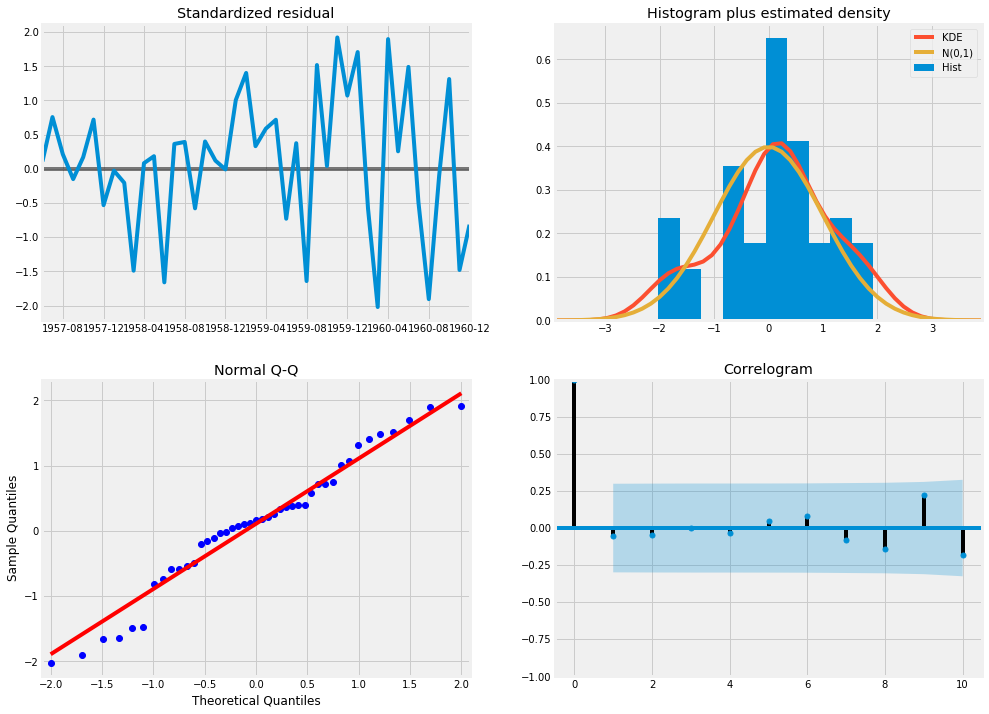

In [12]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [13]:
pred = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=False)
pred_ci = pred.conf_int()

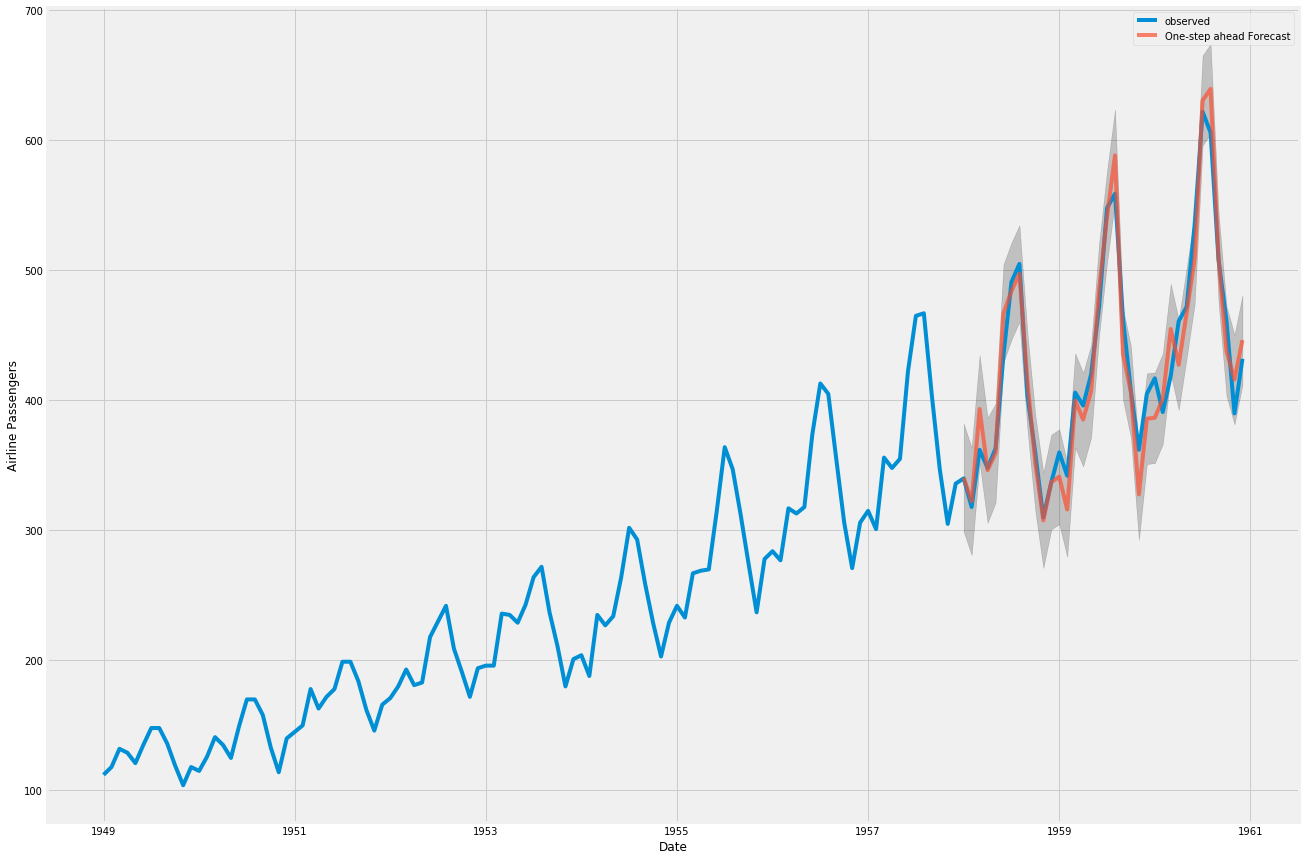

In [14]:
ax = y['1949':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend()

plt.show()

In [15]:
# Extract the predicted and true values of our time series
y_forecasted = pred.predicted_mean
y_truth = y['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 383.68


In [16]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

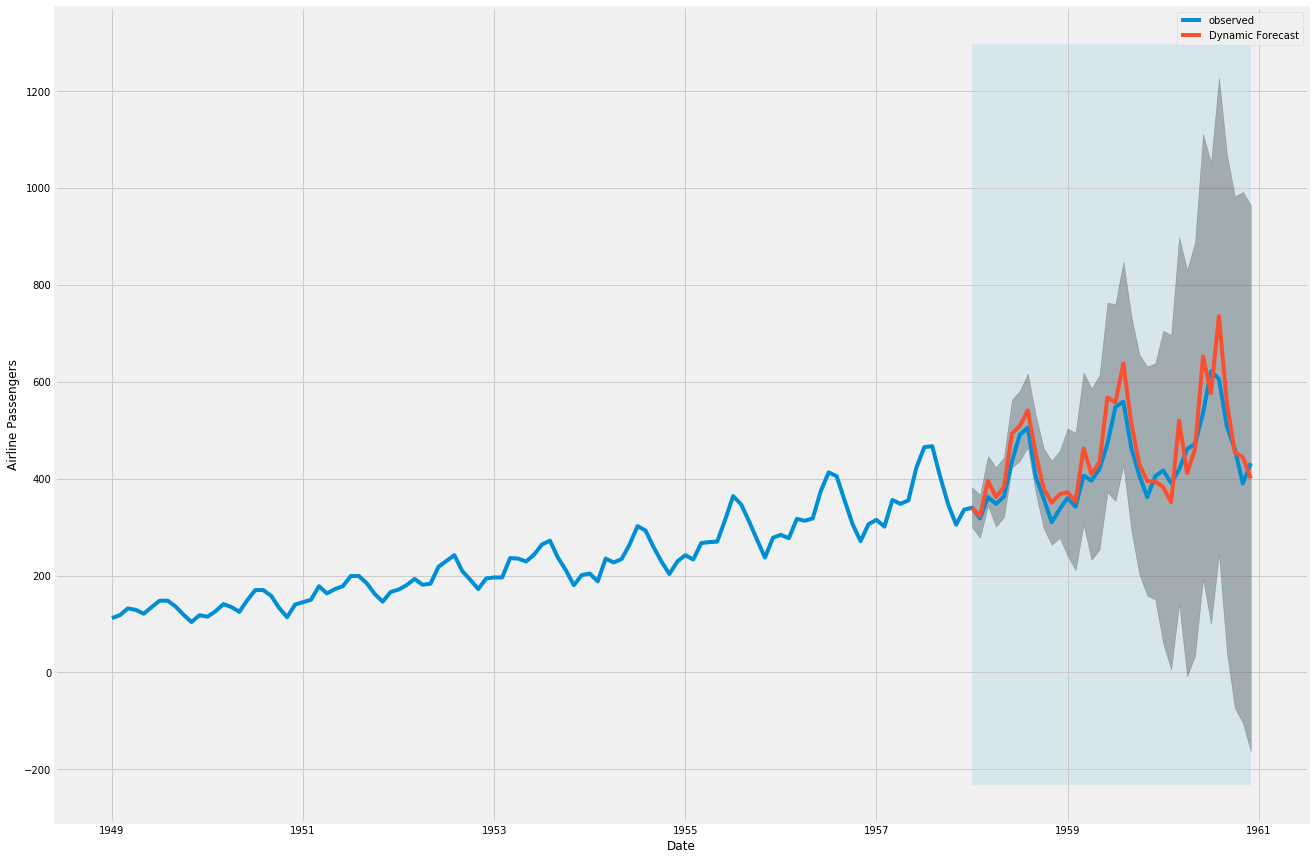

In [17]:
ax = y['1949':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()

In [18]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2497.06


In [19]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

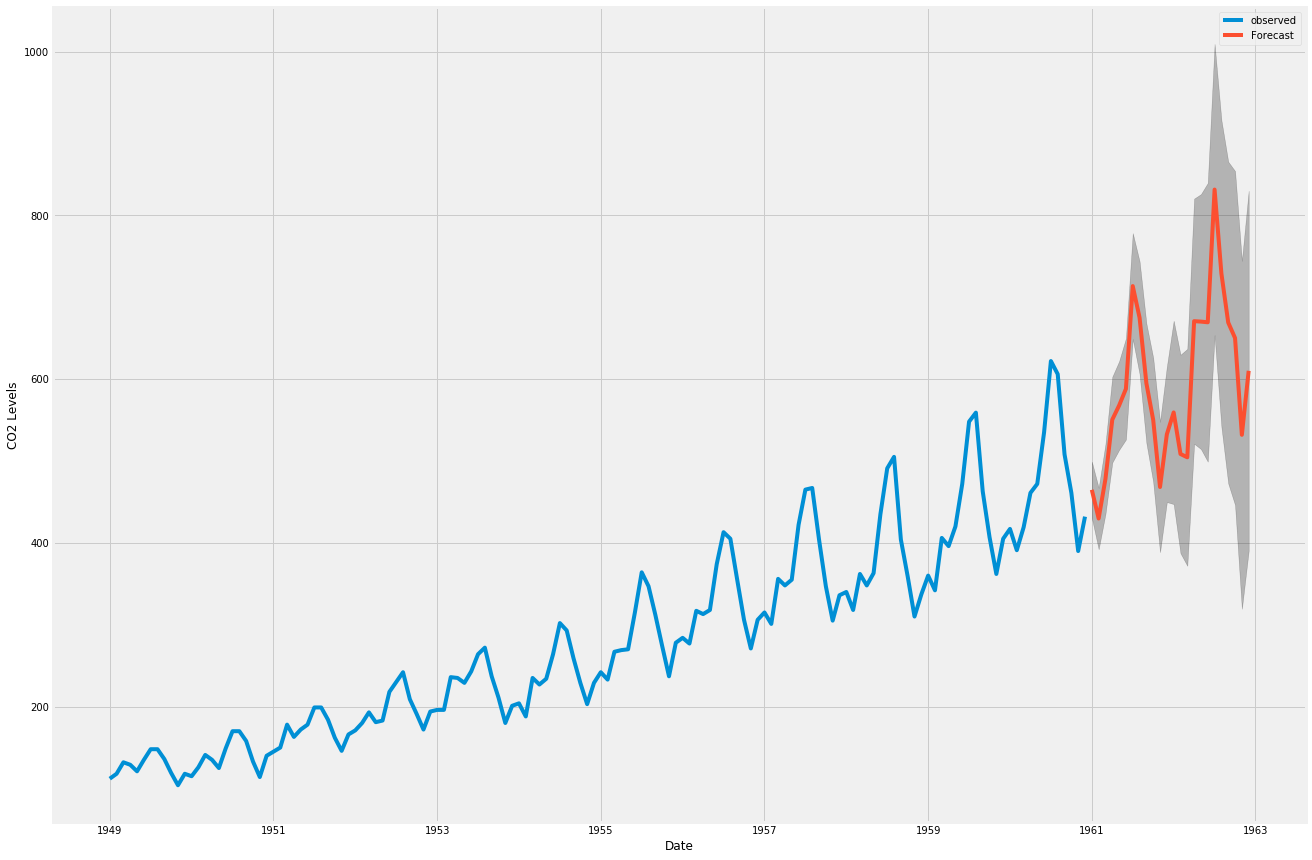

In [20]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()